In [17]:
import numpy as num
import pylab as lab
import scipy as sci
import pandas as pan
from IPython.core.display import HTML


%matplotlib inline

In [18]:
pan.set_eng_float_format(accuracy=2, use_eng_prefix=False)
pan.options.display.float_format = '{:,.2f}'.format
pan.set_option('display.max_rows', 500)

In [19]:
Zhou=pan.read_csv("Zhou.info.dat",sep=" ",names=["atom","type","lat","re","fe","rhoe","rhos","alpha","beta","A","B"\
                                                     ,"kappa","lam","Fn0","Fn1","Fn2","Fn3","F0","F1","F2","F3","eta","Fe","rhol","rhoh"])

In [20]:
Zhou

,atom,type,lat,re,fe,rhoe,rhos,alpha,beta,A,...,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,rhol,rhoh
0,Cu,Zhou2004,FCC,2.56,1.55,21.18,21.18,8.13,4.33,0.40,...,1.09,-0.82,-2.19,0,0.56,-2.10,0.31,-2.19,0.85,1.15
1,Ag,Zhou2004,FCC,2.89,1.11,14.60,14.60,9.13,4.87,0.28,...,0.91,-0.56,-1.75,0,0.74,-1.15,0.78,-1.75,0.85,1.15
2,Au,Zhou2004,FCC,2.89,1.53,19.99,19.99,9.52,5.08,0.23,...,1.60,-0.84,-2.98,0,1.71,-1.13,1.02,-2.98,0.85,1.15
3,Ni,Zhou2004,FCC,2.49,2.01,27.56,27.56,8.38,4.47,0.43,...,0.24,-2.38,-2.70,0,0.27,-0.15,0.45,-2.70,0.85,1.15
4,Pd,Zhou2004,FCC,2.75,1.60,21.34,21.94,8.70,4.64,0.41,...,1.62,-0.23,-2.36,0,1.48,-1.68,1.13,-2.35,0.85,1.15
5,Pt,Zhou2004,FCC,2.77,2.34,33.37,35.21,7.11,3.79,0.56,...,0.53,1.22,-4.17,0,3.01,-2.42,1.45,-4.15,0.25,1.15
6,Al,Zhou2004,FCC,2.86,1.40,20.42,23.20,6.61,3.53,0.31,...,1.26,-1.25,-2.83,0,0.62,-2.49,0.79,-2.82,0.85,1.15
7,Pb,Zhou2004,FCC,3.50,0.65,8.45,8.45,9.12,5.21,0.16,...,0.68,-0.53,-1.44,0,0.70,-0.54,0.94,-1.44,0.85,1.15
8,Fe,Zhou2004,BCC,2.48,1.89,20.04,20.04,9.82,5.24,0.39,...,0.19,-2.28,-2.54,0,0.20,-0.15,0.39,-2.54,0.85,1.15
9,Mo,Zhou2004,BCC,2.73,2.72,29.35,29.35,8.39,4.48,0.71,...,0.38,-3.13,-3.71,0,0.88,0.78,0.79,-3.71,0.85,1.15


In [21]:
Zhou1=Zhou.copy(deep=True)
Zhou1.A = Zhou1.A * 3
Zhou1.rhoe * 1.15

0    24.35
1    16.79
2    22.99
3    31.70
4    24.54
5    38.37
6    23.48
7     9.72
8    23.05
9    33.76
10   38.86
11   42.82
12    8.20
13   31.29
14   29.40
15   35.51
Name: rhoe, dtype: float64

In [22]:
#nV=[4,3,3,2,4,4,3,4,3,6,5,6,2,3,4,4]
#charge=[]
#Zhou['nV'] = nV
#Zhou

In [23]:
AA = 13.843
BB= 19.05295
scaleAlpha = 1
scaleA = 1
scaleB = 1
oxygenData=(1.20752, 30.000000 , 30.000000, 6.08352,  4.42,    AA,  BB,   0.08007,  0.39310,0)
#oxygenData2=(1.207, 30.000000 , 30.000000, 4.69837, 4.31951,    59.124,64.6234,   0.85,  0.85,0)
oxygenData2=(1.207, 30.000000 , 30.000000, 9.10636, 4.55318,    5.211,10.422,   0.436,  0.872,0)

In [24]:
def fEleO_(r,oxygenData):
    re,fe,rhoe,alpha,beta,A,B,kappa,lam,F0=oxygenData
    return fe*num.exp(-beta*((r/re)-1))/(1+((r/re)-lam)**20)

def phiNO_(r,oxygenData):
    re,fe,rhoe,alpha,beta,A,B,kappa,lam,F0=oxygenData
    return A*num.exp(-alpha*(r/re-1))/(1+((r/re)-kappa)**20)
    
                     
def phiEO_(r,oxygenData):
    re,fe,rhoe,alpha,beta,A,B,kappa,lam,F0=oxygenData
    return -B*num.exp(-beta*((r/re)-1))/(1+((r/re)-lam)**20)
    

def phiTO_(r,oxygenData):
    return phiNO_(r,oxygenData) + phiEO_(r,oxygenData)

In [25]:
def fEle_(r,n,frame):
    data=list(frame.iloc[n])
    atom,name,lat,re,fe,rhoe,rhos,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,rhol,rhoh=data
   
    return fe*num.exp(-beta*((r/re)-1))/(1+((r/re)-lam)**20)

def phiN_(r,n,frame):
    data=list(frame.iloc[n])
    atom,name,lat,re,fe,rhoe,rhos,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,rhol,rhoh=data
    return A*num.exp(-alpha*(r/re-1)) / (1 + ((r/re)-kappa)**20 )
#def phiE(r,q):
#    return (1-q/N)*B*num.exp(-beta*(r/re-1))/(1+(r/re-kappa)**20)

def phiE_(r,n,frame):
    data=list(frame.iloc[n])
    atom,name,lat,re,fe,rhoe,rhos,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,rhol,rhoh=data
    return -B*num.exp(-beta*((r/re)-1))/(1+((r/re)-lam)**20)


def phiT_(r,n,frame):
    return phiN_(r,n,frame) + phiE_(r,n,frame)



In [26]:
def g(nM,nV,q):
    return (nV-q)**2 * (nM+nV+q)/(nV**2 * (nV+nM))

scale=0.7
gM = g(2,2,2)
gO = g(2,6,-2)


gO_neutral =  g(2,6,0)
gO_neutral,gO,gM

(1.0, 1.3333333333333333, 0.0)

In [27]:
def phiN_OM(r,n,frame,oxygenData):
    return 1/2*(phiN_(r,n,frame)*(fEleO_(r,oxygenData)/fEle_(r,n,frame))+phiNO_(r,oxygenData)*(fEle_(r,n,frame)/fEleO_(r,oxygenData)))

def phiE_OM(r,n,frame,oxygenData):
    return 1/2*(gO*phiE_(r,n,frame)*(fEleO_(r,oxygenData)/fEle_(r,n,frame))+gM*phiEO_(r,oxygenData)*(fEle_(r,n,frame)/fEleO_(r,oxygenData)))
def phiT_OM(r,n,frame,oxygenData):
    return phiN_OM(r,n,frame,oxygenData) + phiE_OM(r,n,frame,oxygenData)


def phiN_OO(r,n,frame,oxygenData):
    return phiNO_(r,oxygenData)

def phiE_OO(r,n,frame,oxygenData):
    return (gO*phiEO_(r,oxygenData))
def phiT_OO(r,n,frame,oxygenData):
    return phiN_OO(r,n,frame,oxygenData) + phiE_OO(r,n,frame,oxygenData)

def phiN_OM_Average(r,n,frame,oxygenData):
    return 1/2*(phiN_(r,n,frame)+phiNO_(r,oxygenData))



def phiN_MM(r,n,frame):
    return phiN_(r,n,frame)

def phiE_MM(r,n,frame):
    return 0
def phiT_MM(r,n,frame):
    return phiN_MM(r,n,frame) + phiE_MM(r,n,frame)


def phiN_OM_Mixed(r,n,frame,oxygenData):
    data=list(frame.iloc[n])
    atom,name,lat,re,fe,rhoe,rhos,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,rhol,rhoh=data
    reO,feO,rhoeO,alphaO,betaO,AO,BO,kappaO,lamO,F0O=oxygenData
    
    re_m = (re+reO)/2
    A_m1 = (A+AO)/2
    A_m2 = num.sqrt(A*AO)
    alpha_m = alpha*alphaO/(alpha + alphaO)
    print(f"alpha_mix:{alpha_m}  alpha:{alpha} alphaO:{alphaO}")
    #kappa_m = (kappa + kappaO)/2
    kappa_m = min(kappa,kappaO)
    print(f"kappa_mix:{kappa_m}  kappa:{kappa} kappaO:{kappaO}")
    return A_m1*num.exp(-alpha_m*(r/re_m-1)) / (1 + ((r/re_m)-kappa_m)**20 )


def phiT_OM_Mixed(r,n,frame,oxygenData):
    return phiN_OM_Mixed(r,n,frame,oxygenData) + phiE_OM(r,n,frame,oxygenData)
                                                
   

SyntaxError: invalid syntax (<ipython-input-27-7809aee67f56>, line 41)

In [12]:
def F_(rho,n,frame):
    func=[]
    data=list(frame.iloc[n])
    atom,name,lat,re,fe,rhoe,rhos,alpha,beta,A,B,kappa,lam,Fn0,Fn1,Fn2,Fn3,F0,F1,F2,F3,eta,Fe,rhol,rhoh=data
    rhon=rhol*rhoe
    rho0=rhoh*rhoe
    
    for var in rho:
        if(var<rhon):
            func.append(Fn0*((var/rhon)-1)**0+Fn1*((var/rhon)-1)**1+Fn2*((var/rhon)-1)**2+Fn3*((var/rhon)-1)**3)
        elif (var>=rhon and var<rho0):
            func.append(F0*((var/rhoe)-1)**0+F1*((var/rhoe)-1)**1+F2*((var/rhoe)-1)**2+F3*((var/rhoe)-1)**3)
        else:
            func.append(Fe*(1-(num.log((var/rhos)**eta)))*(var/rhos)**eta)
    func=num.asarray(func)
    return func



def JM(r,q1,q2,N,n,frame):
    fe1=fEle_(r,n,frame)
    phi1=phiT_(r,n,frame)
    
    fe2=fEle_(r,n,frame)
    phi2=phiT_(r,n,frame)
    fe1s = (1-(q1/N))*fe1
    fe2s = (1-(q2/N))*fe2
    jphi = 0.5* (fe1s/fe2s*phi2 + fe2s/fe1s * phi1)
    return jphi

In [33]:
r=num.linspace(1.,4,50)
atomIndex=12
pot_OO = phiTO_(r,oxygenData)
pot_MM = phiT_(r,atomIndex,Zhou)
pot_OM = phiT_OM(r,atomIndex,Zhou,oxygenData)

folder = "/home/hbhattar/groupspace/hbhattar/OxideLibraryNew/NewOxides/EmbedPlot/TestPotential/" 
file = "analyticalCalc.dat"
with open(folder + file,"w") as f:
    f.write("#dist\tOO\tMM\tOM\n")
    for index,dist in enumerate(r):
        f.write(f"{dist}\t{pot_OO[index]}\t{pot_MM[index]}\t{pot_OM[index]}\n")
    
print(phiT_OM(1.9,atomIndex,Zhou,oxygenData))

Mg
Mg
Mg
Mg
Mg
Mg
Mg
Mg
0.05399596173370258


In [34]:
scaleAlpha = 1
scaleA = 1
scaleB = .5
oxygenData1=oxygenData2
#oxygenData1=(1.20752, 30.000000 , 30.000000, 6.08352 * scaleAlpha,  4.42,    scaleA* AA,  scaleB*BB,   0.08007,  0.39310,0)

Mg
Mg
Mg
Mg
Mg
Mg
Mg
Mg
0.0156617421145481


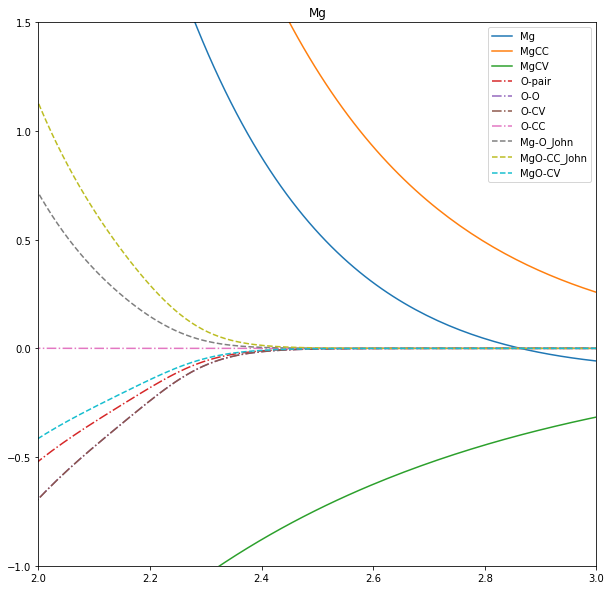

Al
Al
Al
Al
Al
Al
Al
Al
0.0156617421145481


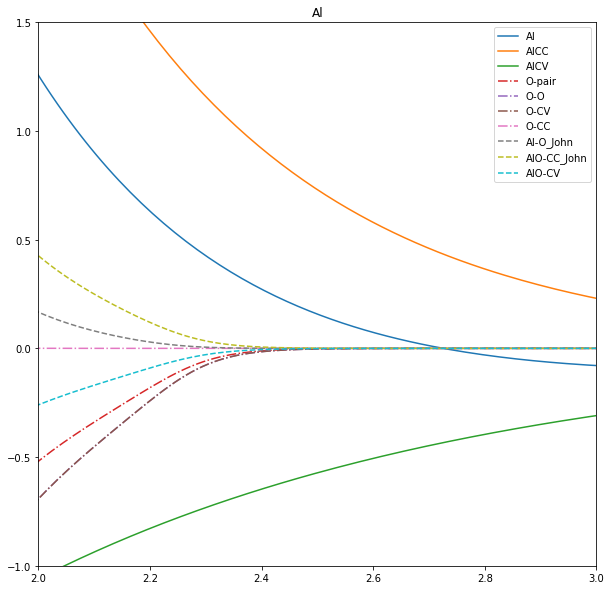

Ti
Ti
Ti
Ti
Ti
Ti
Ti
Ti
0.0156617421145481


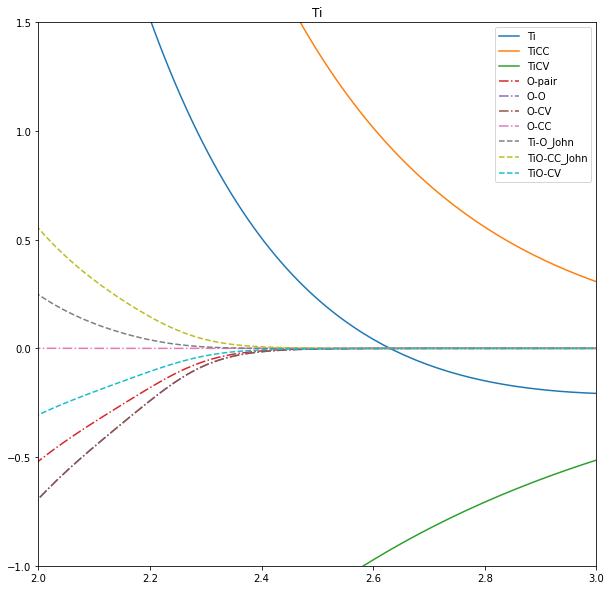

In [35]:
#lab.plot(r,U,'.',markersize=1)
r=num.linspace(0,5,500)
#6,14,12
for var in [12,6,14]:
    fig=lab.figure(figsize=(10,10))
    lab.title(Zhou.iloc[var]["atom"])
    #lab.plot(r,phiTO_(r,oxygenData),label="O")
    #lab.plot(r,phiNO_(r,oxygenData1),label="ON")
    #lab.plot(r,phiEO_(r,oxygenData1),label="OE")
    
    lab.plot(r,phiT_(r,var,Zhou),label=Zhou.iloc[var]["atom"])
    lab.plot(r,phiN_(r,var,Zhou), label=Zhou.iloc[var]["atom"]+"CC")
    lab.plot(r,phiE_(r,var,Zhou), label=Zhou.iloc[var]["atom"]+"CV")
    
    
    #lab.plot(r,phiN_OM(r,var,Zhou,oxygenData1),label=Zhou.iloc[var]["atom"]+"-O_CC")
    #lab.plot(r,phiT_OM(r,var,Zhou,oxygenData1),label=Zhou.iloc[var]["atom"]+"-OT")

    #lab.plot(r,phiE_OM(r,var,Zhou,oxygenData1),label=Zhou.iloc[var]["atom"]+"-O_CV")
    
    
    #lab.plot(r,phiT_OM(r,var,Zhou,oxygenData1),'.-',label=Zhou.iloc[var]["atom"]+"-O")
    #lab.plot(r,phiT_OM(r,var,Zhou,oxygenData),'--',label=Zhou.iloc[var]["atom"]+"-O")

    lab.plot(r,phiTO_(r,oxygenData1),'-.',label="O-pair")
    lab.plot(r,phiT_OO(r,var,Zhou,oxygenData1),'-.',label="O-O")
    lab.plot(r,phiE_OO(r,var,Zhou,oxygenData1),'-.',label="O-CV")
    lab.plot(r,phiN_OO(r,var,Zhou,oxygenData1),'-.',label="O-CC")

    #lab.plot(r,phiTO_(r,oxygenData),label="O-O")

    #lab.plot(r,phiT_MM(r,var,Zhou),label=Zhou.iloc[var]["atom"]+Zhou.iloc[var]["atom"])
    #lab.plot(r,phiT_OO(r,var,Zhou,oxygenData),label='OO')
    
    
    #lab.plot(r,phiT_(r,var,Zhou),label=Zhou.iloc[var]["atom"]+"scaled")
    lab.plot(r,phiT_OM(r,var,Zhou,oxygenData1),'--',label=Zhou.iloc[var]["atom"]+"-O_John")
   # lab.plot(r,phiT_OM_Mixed(r,var,Zhou,oxygenData1),'.-.',label=Zhou.iloc[var]["atom"]+"-O_Mixed")
    lab.plot(r,phiN_OM(r,var,Zhou,oxygenData1),'--',label=Zhou.iloc[var]["atom"]+"O-CC_John")
    #lab.plot(r,phiN_OM_Mixed(r,var,Zhou,oxygenData1),'--',label=Zhou.iloc[var]["atom"]+"O-CC_Mixed")
    lab.plot(r,phiE_OM(r,var,Zhou,oxygenData1),'--',label=Zhou.iloc[var]["atom"]+"O-CV")


    
    #lab.plot(r,phiNO_(r,oxygenData)/(fEleO_(r,oxygenData)/fEle_(r,var,Zhou)),'r-',label=Zhou.iloc[var]["atom"]+"Invscaled")
    #lab.plot(r,phiN_(r,var,Zhou)*(fEleO_(r,oxygenData)/fEle_(r,var,Zhou)),'b-',label=Zhou.iloc[var]["atom"]+"scaled")

    #lab.plot(r,fEle_(r,var,Zhou),label=Zhou.iloc[var]["atom"]+"den")
    #lab.plot(r,8/6*fEleO_(r,oxygenData1),label="O-ele")
    #lab.plot(r,fEle_(r,var,Zhou),label="O-ele-old")

    print(8/6*fEleO_(2.46,oxygenData1))
    #lab.plot(r,phiT_(r,var,Zhou),label=Zhou.iloc[var]["atom"]+"scaled")
    
    lab.ylim([-1,1.5])
    lab.xlim([2,3])
    lab.legend(loc="upper right")
    lab.show()

In [16]:
oxides = [
"Al2O3",
"alpha-Fe2O3",
"Co3O4",
"CoO",
"Cu2O",
"Fe3O4",
"MgO",
"MoO2",
"Pb3O4",
"PbO2",
"red-PbO",
"Ti2O3",
"Ti3O5",
"TiO2-anatase",
"TiO2-rutile",
"TiO",
"WO2",
"WO3",
"yellow-PbO",
"ZrO2",
]
atomDict={}
atom=Zhou.atom
for index,atom in enumerate(atom):
    atomDict[atom] = index

oxideDict ={
"Al2O3":"Al",
"alpha-Fe2O3":"Fe",
"Co3O4":"Co",
"CoO":"Co",
"Cu2O":"Cu",
"Fe3O4":"Fe",
"MgO":"Mg",
"MoO2":"Mo",
"Pb3O4":"Pb",
"PbO2":"Pb",
"red-PbO":"Pb",
"Ti2O3":"Ti",
"Ti3O5":"Ti",
"TiO2-anatase":"Ti",
"TiO2-rutile":"Ti",
"TiO":"Ti",
"WO2":"W",
"WO3":"W",
"yellow-PbO":"Pb",
"ZrO2":'Zr',    
    
    
    
    
}
atomDict

folder = "/home/hbhattar/groupspace/hbhattar/OxideLibraryNew/NewOxides/EmbedPlot/OxideStable/"
Outfile = "pairFull_Al2O3_O.dat"
OutfileLog = "pairFull_Al2O3_O.log"
fileOut = open(folder + Outfile,'w')
fileOutLog = open(folder + OutfileLog,'w')
fileOutLog.write("Pair potential at O\n")
for oxide in ["Al2O3"]:
    infileName= folder + oxide + "_Orginal_Distances.dat"
    distName= folder + oxide + "_Distance_OM.dat"
    infile = open(infileName,"r")
    lines = infile.readlines()
    infile.close()
    potList=[]
    for line in lines:
        pot=0
        splitted=line.split(",")[4:-1]
        for index in range(0,len(splitted),2):
            element = splitted[index]
            distance = splitted[index+1]
            den = 8/6*fEleO_(float(distance),oxygenData1)
            if element == "O":
                print(element,distance,den)
                
                fileOutLog.write("%s\t%s\t%f\n"%(element,distance,den))
                #pot = pot+ phiT_OO(float(distance),n,Zhou,oxygenData)
            else:
                n = atomDict[element]
                print(element,distance,den)
                

                fileOutLog.write("%s\t%s\t%f\n"%(element,distance,den))
                #pot =pot+ phiT_OM(float(distance),n,Zhou,oxygenData)
                
        potList.append(pot)
        #print(potList)
    pair=sum(potList)/len(potList)
    distName.close()
    fileOut.write("%s\t%f\n"%(oxide,pair))
#fileOut.close()
fileOutLog.close()
    
 

Al 1.854269 3.479537642116556
Al 1.854270 3.479524491965068
Al 1.973291 2.2116614902235194
Al 1.973358 2.2110882871748836
O 2.528659 0.00479312307123614
O 2.528700 0.004789767055829465
O 2.621249 0.00101370843491759
O 2.621288 0.0010130581335970005
O 2.725135 0.00019072813537772548
O 2.725180 0.00019059333180584948
O 2.725240 0.00019041374606307033
O 2.725275 0.000190309068059434
O 2.864666 2.27191673304654e-05
O 2.864667 2.2718830962240692e-05
O 2.864688 2.2711768411561712e-05
O 2.864749 2.2691266175645744e-05
Al 3.223068 1.5916139887344687e-07
Al 3.223111 1.590725459390991e-07
Al 3.429400 1.1886568010974848e-08
Al 3.429488 1.1873827566268682e-08
Al 3.557543 2.5646889003509663e-09
Al 3.557581 2.5635434227860497e-09
O 3.791660 1.7759750424511628e-10
O 3.791692 1.7753458172990322e-10
O 3.791723 1.7747364726454777e-10
O 3.791745 1.7743041641442453e-10
Al 3.865244 7.918231426158483e-11
Al 3.865334 7.910479765315668e-11
O 3.953843 3.048591625686201e-11
O 3.953960 3.044789757365223e-11
Al 4

O 12.739396 9.744705901721855e-38
O 12.739404 9.744278420213094e-38
O 12.739448 9.741927608731373e-38
O 12.739448 9.741927608731373e-38
O 12.739449 9.74187418782148e-38
O 12.739449 9.74187418782148e-38
O 12.739460 9.741286577240455e-38
O 12.739461 9.741233159862843e-38
O 12.739499 9.73920351760965e-38
O 12.759439 8.730696297549079e-38
O 12.759439 8.730696297549079e-38
Al 12.760212 8.69378661103131e-38
Al 12.760293 8.689928059780795e-38
Al 12.767181 8.368025153624069e-38
O 12.787810 7.473854061336594e-38
O 12.787819 7.473485690664759e-38
O 12.787886 7.470743949053476e-38
O 12.787907 7.469884805263969e-38
Al 12.798029 7.067121892726772e-38
Al 12.798050 7.066309384311276e-38
O 12.805986 6.765881961371015e-38
O 12.806042 6.763808264898551e-38
O 12.816009 6.404716311889966e-38
O 12.816019 6.404365824383055e-38
O 12.816069 6.402613675913734e-38
O 12.816120 6.400826980697752e-38
Al 12.823237 6.156345229270566e-38
Al 12.823241 6.156210494432228e-38
Al 12.834610 5.784985910688701e-38
Al 12.8346

Al 16.577821 1.711870405729603e-46
Al 16.591325 1.5988054260180023e-46
Al 16.591361 1.5985142481581272e-46
Al 16.591412 1.5981018372582857e-46
Al 16.591447 1.5978188719368212e-46
Al 16.591846 1.5945966178009841e-46
O 16.605765 1.4861776452394806e-46
Al 16.608491 1.465826279558506e-46
Al 16.608499 1.4657669676834385e-46
O 16.608916 1.4626786675044156e-46
O 16.608916 1.4626786675044156e-46
Al 16.611268 1.445381610255683e-46
Al 16.611284 1.445264648695361e-46
O 16.616820 1.4053606534009149e-46
O 16.616836 1.4052469406816142e-46
O 16.616918 1.4046643078560668e-46
O 16.616925 1.4046145821360407e-46
Al 16.617275 1.4021305464674541e-46
Al 16.617369 1.4014641565439844e-46
O 16.630797 1.3094616653312084e-46
O 16.630832 1.3092299567246103e-46
O 16.638472 1.259623153140595e-46
O 16.638519 1.2593238906343967e-46
O 16.638558 1.2590756205777735e-46
O 16.638636 1.2585792277636517e-46
O 16.654576 1.1611480496771673e-46
O 16.654676 1.1605613318549447e-46
O 16.671275 1.0671811146846842e-46
O 16.671290 1

O 19.733988 2.8531412349670934e-53
O 19.734048 2.8523123087023016e-53
O 19.734054 2.8522294293549507e-53
O 19.734087 2.8517736360945834e-53
O 19.748918 2.65414510045898e-53
O 19.752780 2.604975037997681e-53
O 19.752837 2.604256207507792e-53
Al 19.758433 2.5346440915693177e-53
Al 19.758472 2.534165550030092e-53
Al 19.758505 2.53376070100718e-53
Al 19.758545 2.533270061840573e-53
O 19.770835 2.3869429547140035e-53
O 19.770852 2.38674653338324e-53
O 19.772115 2.3721988111888678e-53
O 19.772115 2.3721988111888678e-53
O 19.772178 2.3714754848196947e-53
O 19.772220 2.3709933900734837e-53
Al 19.775220 2.336810965665671e-53
Al 19.776817 2.3188164551545974e-53
Al 19.782589 2.254929770652804e-53
O 19.801052 2.0621838552020617e-53
O 19.801064 2.0620641102907693e-53
O 19.804071 2.0322766759793432e-53
O 19.804163 2.031372153376371e-53
Al 19.817390 1.9054392499158693e-53
Al 19.817429 1.9050797520172866e-53
Al 19.818444 1.8957474619671743e-53
O 19.822283 1.860862815147597e-53
Al 19.822580 1.858190972

Al 22.612833 3.119236720326779e-59
O 22.614901 3.0890665091724897e-59
O 22.621996 2.987761891784772e-59
O 22.621996 2.987761891784772e-59
O 22.622001 2.987691686972801e-59
O 22.622001 2.987691686972801e-59
O 22.622059 2.9868774319349053e-59
O 22.622059 2.9868774319349053e-59
O 22.622096 2.9863581095432657e-59
O 22.622096 2.9863581095432657e-59
O 22.648633 2.636251386252515e-59
O 22.648648 2.636065600224496e-59
O 22.648661 2.6359045962783052e-59
O 22.649715 2.622883621068708e-59
O 22.649725 2.6227603915326496e-59
Al 22.655163 2.5566001731373287e-59
Al 22.655215 2.5559756659621225e-59
Al 22.657001 2.5346187719507744e-59
Al 22.658881 2.512330960152081e-59
Al 22.677814 2.2985353370932426e-59
Al 22.677877 2.297855253764327e-59
Al 22.683059 2.2426004929805123e-59
Al 22.693870 2.1315728177385985e-59
O 22.696466 2.105742703795211e-59
O 22.696483 2.1055745920966815e-59
O 22.696569 2.104724350739433e-59
Al 22.696985 2.1006164093203022e-59
Al 22.698772 2.0830612116542482e-59
Al 22.698806 2.082728

Al 6.571560 4.075515161718487e-21
Al 6.571585 4.074761657275558e-21
O 6.579285 3.849263024302264e-21
O 6.579314 3.84843806050492e-21
O 6.579341 3.847670151602382e-21
O 6.579349 3.84744265281902e-21
O 6.590393 3.546007118720301e-21
O 6.590477 3.543808437383982e-21
O 6.659787 2.1275865968844867e-21
O 6.659787 2.1275865968844867e-21
O 6.659806 2.1272899409128683e-21
O 6.659806 2.1272899409128683e-21
Al 6.674743 1.906550713291945e-21
Al 6.674845 1.905125875773063e-21
Al 6.676304 1.884862633505766e-21
Al 6.676382 1.883785495702382e-21
Al 6.676404 1.8834818002219595e-21
Al 6.676481 1.882419256089003e-21
O 6.753459 1.0728085217141135e-21
O 6.753459 1.0728085217141135e-21
O 6.767683 9.673299554967907e-22
O 6.767684 9.67322921327068e-22
O 6.767702 9.67196315119709e-22
O 6.767717 9.670908227516582e-22
Al 6.809145 7.159150623838377e-22
Al 6.809217 7.155416305979958e-22
O 6.827403 6.272556698308176e-22
O 6.827443 6.270741541688836e-22
Al 6.852010 5.250478840991736e-22
Al 6.852034 5.249569006728333

O 13.210620 7.471713485873611e-39
O 13.210640 7.470903999177879e-39
O 13.210664 7.469932731439728e-39
Al 13.222453 7.007849460443828e-39
Al 13.222541 7.004510445389884e-39
Al 13.228868 6.768584021218272e-39
Al 13.228900 6.767411298145682e-39
O 13.235852 6.51741594750164e-39
O 13.235852 6.51741594750164e-39
O 13.235903 6.515616681697515e-39
O 13.235903 6.515616681697515e-39
O 13.235915 6.515193397562953e-39
O 13.235915 6.515193397562953e-39
O 13.235928 6.514734870924296e-39
O 13.235928 6.514734870924296e-39
O 13.239325 6.396022549523767e-39
O 13.239325 6.396022549523767e-39
O 13.239335 6.395676314825273e-39
O 13.239335 6.395676314825273e-39
Al 13.248974 6.070545162039578e-39
Al 13.248996 6.069822404481816e-39
O 13.252807 5.945916644779049e-39
O 13.252824 5.945369660849905e-39
O 13.252830 5.94517661976768e-39
O 13.252896 5.94305358339549e-39
Al 13.254680 5.885954893443755e-39
Al 13.254766 5.883216344111235e-39
O 13.278966 5.161298393550714e-39
O 13.279036 5.1593448650024044e-39
O 13.2790

Al 17.033901 1.7170875898101712e-47
Al 17.033987 1.7163458932800603e-47
O 17.038509 1.6777958010410932e-47
O 17.038509 1.6777958010410932e-47
O 17.038555 1.6774081465069075e-47
O 17.038555 1.6774081465069075e-47
O 17.038563 1.6773407374989599e-47
O 17.038563 1.6773407374989599e-47
O 17.038595 1.677071128639417e-47
O 17.038595 1.677071128639417e-47
Al 17.039326 1.670924076012198e-47
Al 17.039413 1.670193990859661e-47
O 17.043551 1.635835840459927e-47
O 17.043580 1.6355975700299347e-47
Al 17.053131 1.5589882137148133e-47
Al 17.053238 1.5581506671269227e-47
O 17.072092 1.4173996231714617e-47
O 17.072093 1.4173925067333706e-47
O 17.083043 1.3415773077318359e-47
O 17.083063 1.3414426220250482e-47
O 17.083153 1.3408367041709758e-47
O 17.083156 1.3408165116379433e-47
Al 17.083541 1.3382276663598653e-47
Al 17.083562 1.3380866009084724e-47
O 17.094293 1.2679186844873213e-47
O 17.094293 1.2679186844873213e-47
O 17.094302 1.2678614119994545e-47
O 17.094302 1.2678614119994545e-47
O 17.094321 1.267

O 19.687863 3.5674817342409047e-53
O 19.687918 3.566531110560529e-53
O 19.687918 3.566531110560529e-53
Al 19.690737 3.5181458577670515e-53
Al 19.690792 3.5172084125873493e-53
Al 19.691421 3.5065052391251205e-53
Al 19.691536 3.50455191248139e-53
O 19.706316 3.26237349876438e-53
O 19.706422 3.260698653091307e-53
O 19.710872 3.1911589253056305e-53
O 19.714442 3.1364471015648635e-53
O 19.714472 3.135991345180396e-53
O 19.720917 3.039602929533771e-53
O 19.720933 3.0393673748132164e-53
O 19.720950 3.039117117972821e-53
O 19.720953 3.0390729571452733e-53
O 19.720970 3.038822724606069e-53
O 19.720987 3.0385725127210726e-53
O 19.721078 3.0372334943396973e-53
Al 19.726202 2.962783079723867e-53
O 19.727478 2.9445293919935706e-53
O 19.727572 2.9431891514703368e-53
Al 19.729283 2.91890051142774e-53
Al 19.729317 2.9184199032234692e-53
O 19.733970 2.853389959933419e-53
O 19.734136 2.851096986857622e-53
Al 19.750224 2.6374141734029566e-53
O 19.752746 2.6054039087799143e-53
O 19.752824 2.60442013379824

O 22.622036 2.9872002995671303e-59
O 22.622036 2.9872002995671303e-59
O 22.622059 2.9868774319349053e-59
O 22.622059 2.9868774319349053e-59
O 22.648598 2.636684938005912e-59
O 22.648628 2.6363133178439257e-59
O 22.648635 2.6362266140241363e-59
O 22.648643 2.6361275274428774e-59
O 22.649725 2.6227603915326496e-59
O 22.649762 2.6223044926858207e-59
O 22.649763 2.6222921721974002e-59
O 22.649839 2.621355984760487e-59
Al 22.656929 2.5354762754198773e-59
Al 22.656972 2.534964120338664e-59
Al 22.683083 2.2423477071826816e-59
O 22.696453 2.1058712688739478e-59
O 22.696564 2.104773773956675e-59
Al 22.696929 2.1011689331741003e-59
Al 22.696964 2.1008235887040905e-59
Al 22.698789 2.082894914215397e-59
Al 22.698822 2.0825721395111803e-59
Al 22.698869 2.0821125165989774e-59
Al 22.698902 2.0817898633731402e-59
Al 22.711125 1.965661686286042e-59
Al 22.711169 1.9652555986757658e-59
Al 22.711188 1.9650802686485906e-59
Al 22.711233 1.9646650758340132e-59
O 22.729578 1.8025202942156626e-59
O 22.729692 1

Al 8.478325 8.104891373700198e-27
Al 8.492966 7.373138660219101e-27
Al 8.493058 7.368757754954519e-27
Al 8.500921 7.00387165121226e-27
Al 8.500932 7.003374170694755e-27
Al 8.552188 5.032318438597533e-27
Al 8.552215 5.031443619338106e-27
Al 8.557906 4.850432568991083e-27
Al 8.557916 4.850120353926863e-27
O 8.579117 4.231731101643489e-27
O 8.579191 4.2297181834925205e-27
O 8.579205 4.2293374697821156e-27
O 8.579221 4.2289024107174196e-27
O 8.600302 3.693151757841843e-27
O 8.600302 3.693151757841843e-27
O 8.600321 3.6927011481940836e-27
O 8.600321 3.6927011481940836e-27
O 8.600332 3.692440294267945e-27
O 8.600332 3.692440294267945e-27
O 8.600334 3.692392868277994e-27
O 8.600334 3.692392868277994e-27
Al 8.611890 3.428368819230628e-27
Al 8.611924 3.427620786940583e-27
O 8.643568 2.798124522795738e-27
O 8.643580 2.7979094005228998e-27
O 8.643595 2.7976405211360307e-27
O 8.643635 2.7969236368243486e-27
O 8.666485 2.4162370357656702e-27
O 8.666587 2.414660467226909e-27
Al 8.717668 1.7421818349

O 13.239351 6.395122378471135e-39
O 13.239351 6.395122378471135e-39
Al 13.248971 6.070643726586799e-39
Al 13.249002 6.06962530378771e-39
O 13.252844 5.944726215062367e-39
O 13.252854 5.944404518402998e-39
O 13.252913 5.942506864056615e-39
Al 13.254691 5.885604542466996e-39
Al 13.254788 5.882515990607038e-39
O 13.278972 5.161130919134486e-39
O 13.278978 5.1609634501773834e-39
O 13.279023 5.159707606989413e-39
O 13.279076 5.1582288964873784e-39
O 13.290475 4.8498856052435847e-39
O 13.290521 4.848679578733512e-39
Al 13.297188 4.677032492013785e-39
Al 13.297208 4.67652686926973e-39
O 13.307577 4.4216435889206556e-39
O 13.307577 4.4216435889206556e-39
O 13.307584 4.421476321228357e-39
O 13.307584 4.421476321228357e-39
O 13.307589 4.4213568481970175e-39
O 13.307589 4.4213568481970175e-39
O 13.307595 4.421213484840253e-39
O 13.307595 4.421213484840253e-39
O 13.337614 3.7593378347326905e-39
Al 13.365174 3.239635609819347e-39
Al 13.368394 3.1838282134353746e-39
Al 13.368474 3.1824540578938386e-

Al 17.044450 1.628465622378931e-47
Al 17.053150 1.5588394575204674e-47
O 17.072043 1.417748372547587e-47
O 17.072099 1.4173498088572855e-47
O 17.072099 1.4173498088572855e-47
O 17.083055 1.3414964946800762e-47
O 17.083067 1.3414156865113396e-47
O 17.083153 1.3408367041709758e-47
O 17.083168 1.3407357445559976e-47
Al 17.083553 1.3381470557039856e-47
O 17.094293 1.2679186844873213e-47
O 17.094293 1.2679186844873213e-47
O 17.094321 1.2677405119356264e-47
O 17.094321 1.2677405119356264e-47
O 17.094331 1.2676768849680997e-47
O 17.094331 1.2676768849680997e-47
O 17.094331 1.2676768849680997e-47
O 17.094331 1.2676768849680997e-47
O 17.096042 1.2568373379040441e-47
O 17.096042 1.2568373379040441e-47
O 17.096165 1.2560616983563972e-47
Al 17.111820 1.1611601936840983e-47
Al 17.135175 1.0327782952257459e-47
Al 17.135221 1.0325400290800025e-47
Al 17.154681 9.36531024088072e-48
O 17.157658 9.226548148023354e-48
Al 17.159082 9.160904564073475e-48
O 17.164211 8.92832606833614e-48
O 17.164211 8.928326

Al 20.169159 3.4863789897199086e-54
Al 20.173520 3.4138838938612774e-54
Al 20.175787 3.3767972881517373e-54
O 20.182605 3.267675214542967e-54
O 20.182605 3.267675214542967e-54
O 20.182694 3.266274392658081e-54
O 20.182694 3.266274392658081e-54
O 20.184676 3.2352340492361145e-54
Al 20.213471 2.816229865575092e-54
Al 20.220609 2.7210644012805603e-54
Al 20.220612 2.7210250899819563e-54
Al 20.220699 2.719885309920174e-54
Al 20.220702 2.7198460156959626e-54
Al 20.230264 2.5974494161568702e-54
Al 20.233782 2.553820520458719e-54
O 20.241694 2.4583636421851454e-54
Al 20.247787 2.3872971012566206e-54
O 20.255381 2.301598948760372e-54
O 20.255508 2.3001922848294186e-54
Al 20.268111 2.1648011586254162e-54
Al 20.268137 2.164530269290466e-54
O 20.287432 1.9725834722864173e-54
O 20.287432 1.9725834722864173e-54
O 20.291290 1.936301020899994e-54
O 20.291298 1.936226484381413e-54
O 20.291302 1.9361892172005652e-54
O 20.291303 1.9361799005177358e-54
Al 20.303398 1.826718524711284e-54
Al 20.312180 1.751

O 24.381024 8.177026830859245e-63
Al 24.396253 7.620395126273233e-63
Al 24.396285 7.619266398588869e-63
Al 24.399593 7.503483104387218e-63
Al 24.403314 7.375349272348372e-63
O 24.427649 6.589727205612756e-63
Al 24.434210 6.392650360257792e-63
Al 24.447553 6.009881647191078e-63
Al 24.447612 6.008241147372515e-63
Al 24.450053 5.940760685870161e-63
Al 24.479074 5.194339288180703e-63
O 24.484055 5.076020386608511e-63
O 24.484055 5.076020386608511e-63
O 24.484065 5.075785582375841e-63
O 24.484065 5.075785582375841e-63
O 24.501709 4.6779888322938257e-63
O 24.501773 4.6766042873448445e-63
O 24.523058 4.238175061518999e-63
Al 24.532533 4.0564889045382565e-63
O 24.538746 3.941608817227106e-63
O 24.538746 3.941608817227106e-63
O 24.538844 3.939823123322617e-63
Al 24.539305 3.931433939254976e-63
Al 24.539332 3.9309431538166407e-63
O 24.551115 3.7225132524981926e-63
O 24.553462 3.682338327313006e-63
Al 24.563436 3.516395876909897e-63
Al 24.577875 3.289347226947423e-63
Al 24.628656 2.60127743579030

O 10.658192 1.264165712676688e-32
O 10.658192 1.264165712676688e-32
O 10.725862 8.5106936301845e-33
O 10.725911 8.508258624961863e-33
O 10.751708 7.318885430251956e-33
O 10.751729 7.317988767893158e-33
O 10.751758 7.316750701596362e-33
O 10.751778 7.315896985573599e-33
Al 10.760035 6.97186594585931e-33
Al 10.760065 6.970646136860343e-33
O 10.774139 6.421433984285585e-33
O 10.774143 6.421284249024831e-33
Al 10.784738 6.0367490401915726e-33
Al 10.791739 5.795452780333356e-33
Al 10.791842 5.7919761893274316e-33
O 10.815168 5.056311625110824e-33
O 10.815168 5.056311625110824e-33
O 10.815175 5.056105602187433e-33
O 10.815182 5.055899587710634e-33
O 10.815190 5.0556641529365505e-33
O 10.815196 5.0554875840952044e-33
O 10.815204 5.055252168625412e-33
O 10.815218 5.054840218094595e-33
O 10.815223 5.054693101091083e-33
O 10.815223 5.054693101091083e-33
O 10.815241 5.054163515549655e-33
O 10.815256 5.053722236912426e-33
Al 10.848873 4.156035743605179e-33
Al 10.848920 4.154900252298159e-33
Al 10.

O 14.281439 2.4318220271317946e-41
O 14.281473 2.431385162798399e-41
O 14.281489 2.431179606850545e-41
O 14.281523 2.43074285839692e-41
Al 14.281974 2.4249569664175125e-41
Al 14.281994 2.4247007063000494e-41
O 14.298145 2.226386177000903e-41
O 14.298157 2.226245057759111e-41
O 14.298219 2.2255160847420137e-41
Al 14.304394 2.1541004589306363e-41
O 14.361383 1.5945132239887645e-41
O 14.361439 1.5940422685854367e-41
O 14.361452 1.593932959628548e-41
Al 14.361694 1.591899504867255e-41
Al 14.361700 1.5918491217374033e-41
Al 14.361775 1.591219467689039e-41
Al 14.361782 1.5911607127384556e-41
O 14.369622 1.5267038255880598e-41
O 14.369669 1.526325426489384e-41
O 14.374034 1.4915899771198898e-41
O 14.374034 1.4915899771198898e-41
O 14.374103 1.491047314708741e-41
O 14.374103 1.491047314708741e-41
O 14.378161 1.4594786671888598e-41
O 14.378161 1.4594786671888598e-41
O 14.378207 1.4591246902801735e-41
Al 14.381037 1.4375123822484248e-41
Al 14.381038 1.4375048024788104e-41
Al 14.391436 1.36082047

O 16.078758 2.162110343324884e-45
O 16.078770 2.1619779402249622e-45
Al 16.084404 2.1007046775211583e-45
Al 16.084444 2.100275941106885e-45
Al 16.085060 2.0936844766473337e-45
Al 16.085156 2.0926591065580747e-45
Al 16.096858 1.9713710155859463e-45
Al 16.096867 1.9712805013329036e-45
Al 16.096890 1.9710492060754742e-45
Al 16.096899 1.970958706648217e-45
Al 16.105488 1.886465073074099e-45
O 16.110078 1.8428113390499433e-45
O 16.110078 1.8428113390499433e-45
O 16.110078 1.8428113390499433e-45
O 16.110078 1.8428113390499433e-45
O 16.110092 1.84267975292922e-45
O 16.110092 1.84267975292922e-45
O 16.110092 1.84267975292922e-45
O 16.110092 1.84267975292922e-45
O 16.110098 1.8426233617635587e-45
O 16.110098 1.8426233617635587e-45
O 16.110098 1.8426233617635587e-45
O 16.110098 1.8426233617635587e-45
Al 16.111364 1.8307634709081255e-45
O 16.113194 1.8137552718181268e-45
O 16.113203 1.8136720179296375e-45
O 16.113208 1.8136257674261937e-45
O 16.119899 1.752781737135141e-45
O 16.120008 1.751807698

O 19.317297 2.157337143789786e-52
O 19.322260 2.1058494280107945e-52
Al 19.327055 2.057274929333374e-52
O 19.331706 2.0112325543462763e-52
O 19.331706 2.0112325543462763e-52
O 19.336114 1.968549564429954e-52
O 19.343258 1.9012935939349575e-52
O 19.343339 1.900544391630671e-52
O 19.343339 1.900544391630671e-52
O 19.368921 1.678136846393562e-52
O 19.368941 1.6779735975454577e-52
Al 19.373850 1.6383818887660352e-52
Al 19.378973 1.5980624833180466e-52
O 19.380844 1.5835864844092323e-52
O 19.380844 1.5835864844092323e-52
O 19.380844 1.5835864844092323e-52
O 19.380844 1.5835864844092323e-52
O 19.380879 1.5833169443709981e-52
O 19.380879 1.5833169443709981e-52
Al 19.398751 1.4515191930930348e-52
O 19.415618 1.337235180581334e-52
O 19.415618 1.337235180581334e-52
O 19.415682 1.3368191876151192e-52
O 19.415845 1.3357602914055619e-52
Al 19.416959 1.3285458939948039e-52
Al 19.416999 1.3282875769482266e-52
Al 19.420577 1.3053836418161864e-52
Al 19.421189 1.3015058740955374e-52
Al 19.422217 1.29501

O 23.117490 2.926215528919568e-60
O 23.117509 2.9259554123079377e-60
O 23.117519 2.92581851813292e-60
O 23.117540 2.9255310612517623e-60
O 23.125053 2.824484690424456e-60
O 23.136648 2.6753560686204015e-60
O 23.148716 2.5285148199727886e-60
O 23.148716 2.5285148199727886e-60
O 23.148733 2.528313769209815e-60
O 23.148740 2.5282309882568123e-60
Al 23.161958 2.3766619919279116e-60
Al 23.165653 2.335944031330364e-60
Al 23.165715 2.335266802763785e-60
O 23.187474 2.1093386409162045e-60
O 23.192222 2.0630262099512333e-60
O 23.192222 2.0630262099512333e-60
Al 23.198880 1.9997941750845424e-60
O 23.199492 1.9940802758534777e-60
O 23.217479 1.833256076184789e-60
O 23.221480 1.7992875293454027e-60
O 23.222970 1.7867991765911936e-60
Al 23.255900 1.5319163752110476e-60
Al 23.257967 1.517190585855915e-60
O 23.261756 1.4905641238861952e-60
O 23.261767 1.490487509061907e-60
O 23.261802 1.4902437608677482e-60
O 23.261802 1.4902437608677482e-60
O 23.261819 1.4901253832975317e-60
O 23.264320 1.4728121991

Al 6.571474 4.078108294038929e-21
Al 6.571499 4.077354304406917e-21
O 6.579285 3.849263024302264e-21
O 6.579300 3.848836296548689e-21
O 6.579341 3.847670151602382e-21
O 6.579351 3.847385780250126e-21
O 6.590405 3.545692936889468e-21
O 6.590470 3.543991608124465e-21
O 6.659787 2.1275865968844867e-21
O 6.659787 2.1275865968844867e-21
O 6.659806 2.1272899409128683e-21
O 6.659806 2.1272899409128683e-21
Al 6.674732 1.906704436632927e-21
Al 6.674817 1.9055169003251177e-21
Al 6.676328 1.884531140134507e-21
Al 6.676352 1.8841997057497523e-21
Al 6.676406 1.8834541939984185e-21
Al 6.676430 1.8831229512464383e-21
O 6.753432 1.0730194282839574e-21
O 6.753432 1.0730194282839574e-21
O 6.767590 9.679843595027883e-22
O 6.767622 9.677591377111257e-22
O 6.767697 9.672314818291238e-22
O 6.767698 9.672244483837601e-22
Al 6.809062 7.163457908611641e-22
Al 6.809133 7.159773201774029e-22
O 6.827403 6.272556698308176e-22
O 6.827466 6.269698067215874e-22
Al 6.852125 5.246120666799972e-22
Al 6.852125 5.24612066

O 13.239351 6.395122378471135e-39
O 13.239351 6.395122378471135e-39
Al 13.249011 6.06932966480222e-39
Al 13.249089 6.066768066152046e-39
O 13.252752 5.947686645049811e-39
O 13.252821 5.94546618375233e-39
O 13.252854 5.944404518402998e-39
O 13.252862 5.944147173667095e-39
Al 13.254745 5.883884941504791e-39
Al 13.254831 5.881147359671564e-39
O 13.278972 5.161130919134486e-39
O 13.278978 5.1609634501773834e-39
O 13.279009 5.160098280858424e-39
O 13.279043 5.1591495530053026e-39
O 13.290463 4.850200270412155e-39
O 13.290468 4.85006915743293e-39
O 13.290475 4.8498856052435847e-39
O 13.290521 4.848679578733512e-39
Al 13.297210 4.676476310015456e-39
Al 13.297242 4.675667436622521e-39
O 13.307575 4.4216913808574155e-39
O 13.307575 4.4216913808574155e-39
O 13.307581 4.421548006603825e-39
O 13.307581 4.421548006603825e-39
O 13.307584 4.421476321228357e-39
O 13.307584 4.421476321228357e-39
O 13.307589 4.4213568481970175e-39
O 13.307589 4.4213568481970175e-39
O 13.337600 3.7596220671801016e-39
O 1

O 16.473175 2.908411837568115e-46
O 16.490800 2.6598621743263086e-46
O 16.490839 2.659336521017189e-46
Al 16.510815 2.4033395714616337e-46
Al 16.510896 2.4023535514869195e-46
Al 16.511517 2.3948075360133778e-46
Al 16.511606 2.393728011980256e-46
O 16.519898 2.2952624553869977e-46
O 16.519930 2.294890443484921e-46
Al 16.522324 2.2672301618036095e-46
Al 16.522338 2.2670693934266445e-46
Al 16.537174 2.102969943120167e-46
Al 16.537200 2.102693080808609e-46
O 16.538277 2.091256665317767e-46
O 16.538313 2.0908754693086606e-46
O 16.541873 2.0535216650325516e-46
O 16.541897 2.0532721271069575e-46
Al 16.566265 1.814974838915962e-46
Al 16.566362 1.8140839701450625e-46
O 16.571077 1.7713052052165245e-46
O 16.571077 1.7713052052165245e-46
O 16.571113 1.7709825042607e-46
O 16.571113 1.7709825042607e-46
Al 16.571832 1.7645497872075716e-46
Al 16.571940 1.763585564698032e-46
Al 16.591331 1.5987568926797334e-46
Al 16.591351 1.5985951255600003e-46
Al 16.591418 1.5980533253472215e-46
Al 16.591437 1.59789

O 19.237591 3.1804408139122926e-52
O 19.237637 3.1797281023852296e-52
O 19.237689 3.1789226212929354e-52
O 19.237711 3.178581902414319e-52
O 19.264298 2.7924568852240336e-52
O 19.264382 2.7913146637159925e-52
O 19.275105 2.649285095593844e-52
O 19.275183 2.6482789608073576e-52
Al 19.284138 2.5352770794288848e-52
Al 19.284172 2.5348573829124077e-52
Al 19.284179 2.5347709834529645e-52
Al 19.284212 2.5343637114803304e-52
O 19.284646 2.5290135688842904e-52
O 19.284728 2.5280039849658413e-52
O 19.303541 2.3067396222105532e-52
O 19.303576 2.3063466222045632e-52
O 19.303602 2.306054722796819e-52
O 19.303622 2.3058302099941365e-52
O 19.309198 2.244083064077797e-52
O 19.309198 2.244083064077797e-52
O 19.309223 2.2438099870417304e-52
O 19.309223 2.2438099870417304e-52
O 19.309235 2.243678921897824e-52
O 19.309235 2.243678921897824e-52
O 19.309260 2.2434058941653968e-52
O 19.309260 2.2434058941653968e-52
Al 19.309890 2.236536580166807e-52
Al 19.309915 2.2362644237653996e-52
Al 19.309964 2.2357310

Al 22.309425 1.3008294696023603e-58
Al 22.309447 1.3006945936090249e-58
Al 22.309507 1.300326821206705e-58
Al 22.309528 1.3001981254834855e-58
Al 22.311475 1.2883214703974591e-58
O 22.320551 1.2343765134412985e-58
O 22.320558 1.2343357934829447e-58
Al 22.334078 1.1581472035862808e-58
O 22.334093 1.1580653470488095e-58
O 22.334192 1.1575252392717652e-58
Al 22.341367 1.1190456533243263e-58
Al 22.343533 1.1076832110190575e-58
Al 22.343972 1.105394423972444e-58
Al 22.344070 1.1048841347933057e-58
Al 22.348123 1.0839854891455083e-58
Al 22.348221 1.0834851025298991e-58
O 22.350189 1.0734853699354875e-58
Al 22.355320 1.0478465943389108e-58
O 22.366473 9.942132374822022e-59
O 22.373523 9.617385403335297e-59
O 22.373540 9.616615312468813e-59
Al 22.375397 9.532865131734317e-59
Al 22.375403 9.532595721305888e-59
Al 22.378845 9.37929466453697e-59
Al 22.378869 9.37823446234785e-59
Al 22.380950 9.286761223701615e-59
Al 22.380984 9.285274152751638e-59
O 22.381491 9.26312758540442e-59
O 22.381525 9.26

Al 6.571606 4.07412882249706e-21
O 6.579236 3.850657335324497e-21
O 6.579283 3.849319924953489e-21
O 6.579341 3.847670151602382e-21
O 6.579351 3.847385780250126e-21
O 6.590470 3.543991608124465e-21
O 6.590488 3.543520617005079e-21
O 6.659787 2.1275865968844867e-21
O 6.659787 2.1275865968844867e-21
O 6.659806 2.1272899409128683e-21
O 6.659806 2.1272899409128683e-21
Al 6.674815 1.9055448337573014e-21
Al 6.674817 1.9055169003251177e-21
Al 6.676304 1.884862633505766e-21
Al 6.676382 1.883785495702382e-21
Al 6.676404 1.8834818002219595e-21
Al 6.676481 1.882419256089003e-21
O 6.753432 1.0730194282839574e-21
O 6.753432 1.0730194282839574e-21
O 6.767590 9.679843595027883e-22
O 6.767620 9.677732125199733e-22
O 6.767698 9.672244483837601e-22
O 6.767780 9.666478818918988e-22
Al 6.809165 7.158113115628485e-22
Al 6.809196 7.156505278451182e-22
O 6.827403 6.272556698308176e-22
O 6.827466 6.269698067215874e-22
Al 6.852101 5.247029896596864e-22
Al 6.852125 5.246120666799972e-22
Al 6.976066 2.1533765318

O 13.307589 4.4213568481970175e-39
O 13.307589 4.4213568481970175e-39
O 13.307602 4.42104623349269e-39
O 13.307602 4.42104623349269e-39
O 13.337644 3.758728837887999e-39
O 13.337672 3.7581605302463155e-39
Al 13.365153 3.2400027777994934e-39
Al 13.365197 3.2392335214177144e-39
Al 13.368423 3.183330013195116e-39
Al 13.368441 3.183020824848542e-39
O 13.388036 2.8637071005834216e-39
O 13.388121 2.8623945084134777e-39
O 13.388148 2.8619776938586953e-39
O 13.388203 2.8611288157595763e-39
O 13.388785 2.8521616257106272e-39
O 13.388865 2.8509312312592123e-39
O 13.388869 2.8508697255344434e-39
O 13.388967 2.8493632515758125e-39
Al 13.390673 2.8232660596011003e-39
Al 13.390779 2.821652491273643e-39
Al 13.421918 2.3855860818157856e-39
Al 13.421943 2.385264693373094e-39
Al 13.436806 2.201689129580105e-39
Al 13.436844 2.2012384552571782e-39
Al 13.436862 2.2010250102904404e-39
Al 13.436900 2.20057447251993e-39
O 13.456260 1.982672657216162e-39
O 13.456441 1.9807412197216357e-39
Al 13.457817 1.966119

O 17.096086 1.2565598181725586e-47
O 17.096165 1.2560616983563972e-47
Al 17.111726 1.1617079998985763e-47
Al 17.111869 1.160874737872991e-47
O 17.157658 9.226548148023354e-48
O 17.157743 9.222616608276526e-48
O 17.164211 8.92832606833614e-48
O 17.164211 8.92832606833614e-48
O 17.164259 8.926177681732659e-48
O 17.164269 8.925730166462344e-48
O 17.164269 8.925730166462344e-48
O 17.164303 8.924208782873735e-48
O 17.172617 8.559886655742926e-48
O 17.172730 8.555039124944336e-48
Al 17.183283 8.114257442020998e-48
Al 17.183322 8.11267146374708e-48
Al 17.208203 7.161669164393583e-48
Al 17.208242 7.160269909035819e-48
Al 17.208286 7.158691591173798e-48
Al 17.208325 7.157292919353007e-48
O 17.216560 6.868013918221622e-48
O 17.216560 6.868013918221622e-48
O 17.216604 6.866500213981817e-48
O 17.216604 6.866500213981817e-48
O 17.216709 6.862889317203355e-48
O 17.216807 6.859520865320404e-48
Al 17.235871 6.234811635992264e-48
Al 17.236012 6.230410489408286e-48
Al 17.236683 6.2095086888898e-48
Al 17

O 19.804128 2.0317162176658918e-53
O 19.804213 2.0308807342796317e-53
Al 19.817402 1.9053286279354368e-53
Al 19.817440 1.904978367467544e-53
Al 19.817441 1.9049691509585001e-53
Al 19.817479 1.904618956734318e-53
Al 19.818469 1.8955181817922832e-53
Al 19.818543 1.894839675377056e-53
O 19.822325 1.8604847451695429e-53
O 19.822345 1.860304738910556e-53
Al 19.826119 1.8266481371174316e-53
Al 19.826224 1.8257205240425976e-53
Al 19.830532 1.7880662545348834e-53
Al 19.842472 1.6877231679592615e-53
Al 19.842497 1.6875191046689318e-53
Al 19.842544 1.687135532638235e-53
Al 19.842569 1.686931540571104e-53
Al 19.845262 1.6651016693636175e-53
Al 19.845316 1.664666845408516e-53
Al 19.856014 1.5807301447379662e-53
O 19.856047 1.5804779023399152e-53
O 19.856056 1.5804091159615494e-53
O 19.856143 1.579744335669122e-53
O 19.856155 1.5796526638363517e-53
Al 19.856804 1.5747026804177614e-53
Al 19.856810 1.5746569904726353e-53
Al 19.856854 1.5743219714776808e-53
Al 19.856861 1.5742686795893526e-53
O 19.857

O 22.170997 2.498934247071107e-58
O 22.171020 2.4986630149483526e-58
O 22.184707 2.3423771285564216e-58
O 22.184747 2.34193504814374e-58
Al 22.200516 2.1740100306972825e-58
O 22.201118 2.1678440721306597e-58
O 22.201534 2.1635934516795537e-58
Al 22.202697 2.151754363299264e-58
Al 22.202701 2.151713756382818e-58
Al 22.222929 1.955878572499709e-58
Al 22.223039 1.9548639840352416e-58
Al 22.239997 1.804594283011057e-58
Al 22.249870 1.7224957948400914e-58
O 22.253798 1.690882979297693e-58
O 22.253798 1.690882979297693e-58
O 22.264769 1.6056331171600142e-58
O 22.270181 1.5651792230527385e-58
O 22.283062 1.4729557755595016e-58
O 22.286288 1.450724159083322e-58
Al 22.300702 1.3554274713965635e-58
Al 22.300769 1.3549994828636474e-58
Al 22.303403 1.3382806546589565e-58
Al 22.303445 1.338015748439965e-58
Al 22.307502 1.3126731682619651e-58
Al 22.307594 1.3121040898585797e-58
Al 22.309430 1.3007988147370286e-58
Al 22.309464 1.3005903808479686e-58
Al 22.309511 1.3003023067515709e-58
Al 22.309545 1.

O 28.861787 1.1110557680360664e-71
Al 28.961134 7.112163469505098e-72
Al 29.080857 4.156033490976807e-72
O 29.080868 4.1558284181437634e-72
O 29.111995 3.61427867497663e-72
O 29.117310 3.5291408025236513e-72
O 29.288035 1.6416967128678286e-72
Al 29.326381 1.3825562428054202e-72
O 29.348861 1.2501171747007967e-72
O 29.442270 8.227986573462367e-73
O 29.463762 7.473264225968413e-73
O 29.467040 7.364409290331842e-73
O 29.569391 4.658283942600045e-73
O 29.569391 4.658283942600045e-73
O 29.590706 4.234633801007373e-73
O 29.590861 4.231698801667868e-73
Al 29.596229 4.13130009931179e-73
O 29.626449 3.60899581911416e-73
O 29.712914 2.4518132803557758e-73
O 29.758602 1.998949063924481e-73
O 29.819628 1.5218699767814785e-73
O 29.910605 1.0136882103273226e-73
Al 29.982833 7.342791921500888e-74
O 29.995492 6.9394047098470764e-74
O 30.101965 4.315129654104836e-74
Al 30.128591 3.831907448730007e-74
Al 30.183759 2.996186897023785e-74
O 30.231301 2.4239148986393107e-74
O 30.341094 1.4860126533986562e-7

Al 12.659518 1.510785607999277e-37
O 12.666285 1.4556401367466894e-37
O 12.666285 1.4556401367466894e-37
O 12.666297 1.4555441654336858e-37
O 12.666297 1.4555441654336858e-37
O 12.685578 1.309270089244531e-37
O 12.685619 1.3089753359137805e-37
O 12.685670 1.3086087845867744e-37
Al 12.692591 1.2598103679416921e-37
Al 12.692728 1.2588630965056897e-37
O 12.717570 1.0984056293610485e-37
O 12.717629 1.0980501078981605e-37
O 12.717637 1.098001910501486e-37
Al 12.719572 1.0864063865451811e-37
Al 12.719593 1.0862812209767954e-37
O 12.733206 1.0081183153936863e-37
O 12.733206 1.0081183153936863e-37
O 12.733242 1.0079192888854913e-37
O 12.733294 1.0076318758557087e-37
O 12.739340 9.747698799987682e-38
O 12.739396 9.744705901721855e-38
O 12.739448 9.741927608731373e-38
O 12.739448 9.741927608731373e-38
O 12.739449 9.74187418782148e-38
O 12.739449 9.74187418782148e-38
O 12.739461 9.741233159862843e-38
O 12.739479 9.740271697397772e-38
O 12.739505 9.738883086628147e-38
O 12.739535 9.737281090621143

O 16.497428 2.5720077751149074e-46
O 16.497488 2.5712259162437838e-46
Al 16.510833 2.403120420829312e-46
Al 16.510904 2.4022561888224202e-46
Al 16.511488 2.3951593965299994e-46
Al 16.511589 2.393934175472685e-46
O 16.519930 2.294890443484921e-46
O 16.519939 2.2947858260369447e-46
O 16.519982 2.2942860531564824e-46
Al 16.522308 2.267413911097309e-46
Al 16.537167 2.1030444892218878e-46
O 16.538247 2.0915743819191588e-46
O 16.538286 2.0911613597794235e-46
O 16.538294 2.0910766474034707e-46
O 16.541882 2.0534280847451497e-46
O 16.541925 2.0529810379764852e-46
O 16.541958 2.0526380217948312e-46
Al 16.566269 1.8149380933844e-46
Al 16.566384 1.8138819784741054e-46
Al 16.568765 1.7921538067522702e-46
Al 16.568796 1.7918726404206953e-46
O 16.571077 1.7713052052165245e-46
O 16.571077 1.7713052052165245e-46
O 16.571103 1.771072137498307e-46
O 16.571103 1.771072137498307e-46
O 16.571122 1.7709018382379922e-46
O 16.571122 1.7709018382379922e-46
Al 16.571835 1.764522996108694e-46
Al 16.571942 1.7635

O 19.309260 2.2434058941653968e-52
Al 19.309959 2.2357855091366072e-52
Al 19.310034 2.234969414379471e-52
O 19.317374 2.1565287619384733e-52
O 19.317374 2.1565287619384733e-52
O 19.322359 2.1048350017736787e-52
Al 19.327051 2.0573149785277554e-52
O 19.331706 2.0112325543462763e-52
O 19.331706 2.0112325543462763e-52
O 19.336176 1.96795573571392e-52
O 19.343339 1.900544391630671e-52
O 19.343339 1.900544391630671e-52
O 19.343342 1.9005166490817445e-52
O 19.368921 1.678136846393562e-52
O 19.368941 1.6779735975454577e-52
Al 19.373958 1.6375214652935824e-52
Al 19.378973 1.5980624833180466e-52
O 19.380844 1.5835864844092323e-52
O 19.380844 1.5835864844092323e-52
O 19.380844 1.5835864844092323e-52
O 19.380844 1.5835864844092323e-52
O 19.380879 1.5833169443709981e-52
O 19.380879 1.5833169443709981e-52
Al 19.398849 1.45082767982073e-52
O 19.415618 1.337235180581334e-52
O 19.415618 1.337235180581334e-52
O 19.415682 1.3368191876151192e-52
O 19.415845 1.3357602914055619e-52
Al 19.416955 1.328571728

O 23.518876 4.488820258098853e-61
O 23.522216 4.4194589815892995e-61
O 23.522216 4.4194589815892995e-61
O 23.522216 4.4194589815892995e-61
O 23.522216 4.4194589815892995e-61
O 23.526602 4.3300036589283926e-61
O 23.535685 4.1504760208079543e-61
Al 23.554990 3.793287620825896e-61
O 23.579212 3.388351263063917e-61
Al 23.589603 3.2281912457631956e-61
Al 23.589652 3.227454246441955e-61
Al 23.599516 3.0824722514101793e-61
Al 23.599592 3.0813809096007604e-61
Al 23.604031 3.018304962786745e-61
Al 23.611739 2.9118356599513143e-61
Al 23.632233 2.6466988146812405e-61
O 23.633128 2.6356878289293877e-61
O 23.655916 2.3702780059608998e-61
Al 23.665155 2.2704582026580698e-61
O 23.667621 2.2445345701292184e-61
O 23.667743 2.24325978043345e-61
O 23.683749 2.0821487193577757e-61
O 23.686622 2.0544819857508973e-61
O 23.705752 1.8794193564598036e-61
O 23.705752 1.8794193564598036e-61
Al 23.714378 1.805447857838375e-61
Al 23.714454 1.804809260099162e-61
O 23.744041 1.572629332904755e-61
O 23.744082 1.57232

Al 10.875487 3.5605129805461695e-33
O 10.896514 3.151309716887859e-33
O 10.896514 3.151309716887859e-33
O 10.896532 3.150980510340832e-33
O 10.896532 3.150980510340832e-33
O 10.929779 2.5983117169338566e-33
O 10.929882 2.596760711103682e-33
Al 10.931088 2.5786695450312456e-33
Al 10.931158 2.5776233795656316e-33
Al 10.951437 2.2918399821160908e-33
Al 10.951469 2.2914151893063347e-33
O 10.955172 2.2427898339374524e-33
O 10.955176 2.2427378738640014e-33
O 10.955263 2.2416080418541087e-33
O 10.955271 2.2415041780090984e-33
O 10.956072 2.2311292842235105e-33
O 10.956129 2.230392839836832e-33
O 10.956136 2.230302416160784e-33
O 10.956137 2.2302894987938855e-33
O 11.004605 1.6848128675397854e-33
O 11.004605 1.6848128675397854e-33
O 11.004615 1.6847154555472823e-33
O 11.004615 1.6847154555472823e-33
O 11.004634 1.6845303883714788e-33
O 11.004634 1.6845303883714788e-33
O 11.004694 1.6839460999732485e-33
O 11.004694 1.6839460999732485e-33
Al 11.040261 1.3711115963314834e-33
Al 11.040304 1.370771

O 15.229355 1.705566959549312e-43
O 15.229415 1.7050366387575336e-43
O 15.233220 1.6717413226947846e-43
O 15.233317 1.6709011173568762e-43
O 15.239314 1.6197703836295077e-43
O 15.239400 1.6190486811527815e-43
O 15.239449 1.6186376229223088e-43
Al 15.247490 1.5525816134014282e-43
Al 15.247537 1.5522035761602652e-43
O 15.251441 1.521122759714447e-43
O 15.251447 1.5210754760377612e-43
O 15.251547 1.5202876319111817e-43
O 15.251550 1.520264002916354e-43
Al 15.283600 1.28773957838137e-43
Al 15.286738 1.2669866039674442e-43
Al 15.286788 1.2666586633446909e-43
O 15.298696 1.1909333572831157e-43
O 15.298721 1.1907792546953241e-43
Al 15.301729 1.1723829488569432e-43
Al 15.301738 1.1723283369371164e-43
Al 15.304490 1.1557484130318017e-43
Al 15.304552 1.1553776061047213e-43
Al 15.321872 1.0563296072857202e-43
O 15.334915 9.874052240050711e-44
O 15.334915 9.874052240050711e-44
O 15.334937 9.872928657048403e-44
O 15.347871 9.234088343584379e-44
O 15.347908 9.232321657694533e-44
O 15.347931 9.231223

O 18.679301 4.8749494936621736e-51
O 18.679365 4.873418782881709e-51
Al 18.691133 4.599995125514974e-51
Al 18.691652 4.5882970478655535e-51
Al 18.691788 4.585236590974348e-51
O 18.700552 4.392272398501892e-51
Al 18.701317 4.37582018403632e-51
O 18.715325 4.085252648090034e-51
O 18.715376 4.084230906212677e-51
O 18.721692 3.9596556798614755e-51
O 18.721745 3.9586266046249576e-51
O 18.726510 3.8671943005074743e-51
Al 18.728276 3.8338481580617797e-51
O 18.728321 3.833002231883381e-51
O 18.728321 3.833002231883381e-51
O 18.728415 3.831235789810411e-51
O 18.728438 3.830803699566653e-51
Al 18.733268 3.7411387682693375e-51
O 18.736489 3.6825161586714803e-51
O 18.736516 3.682028668182685e-51
O 18.736583 3.6808192490469307e-51
O 18.736587 3.6807470575203294e-51
Al 18.736928 3.6745979462073396e-51
Al 18.740078 3.61828010295085e-51
Al 18.740161 3.616807933184232e-51
O 18.744348 3.5433172599246954e-51
O 18.744348 3.5433172599246954e-51
Al 18.744993 3.532130006527214e-51
Al 18.745116 3.530000647481

Al 21.750235 1.8276390782457753e-57
O 21.751563 1.81617418381695e-57
O 21.751574 1.8160795201547287e-57
O 21.751617 1.8157095187323302e-57
Al 21.758881 1.7542770117070284e-57
Al 21.802284 1.4282482611699792e-57
Al 21.804449 1.4136782370876062e-57
O 21.815306 1.3428284044593912e-57
O 21.815339 1.342618571861423e-57
Al 21.820820 1.3082192962589662e-57
O 21.822057 1.3005787336680833e-57
O 21.826174 1.2754699188322206e-57
O 21.826174 1.2754699188322206e-57
Al 21.831979 1.2408894010546637e-57
Al 21.834079 1.2286124019791426e-57
Al 21.834115 1.2284030037516823e-57
O 21.855285 1.1112568908930556e-57
O 21.855300 1.1111779879916533e-57
O 21.856682 1.1039324342321948e-57
Al 21.857168 1.1013956995637179e-57
Al 21.865132 1.0606490093983658e-57
Al 21.865191 1.060352851103247e-57
O 21.870152 1.035744588547611e-57
O 21.870152 1.035744588547611e-57
O 21.876069 1.0071413968700417e-57
O 21.876069 1.0071413968700417e-57
O 21.886266 9.596932684397382e-58
O 21.886409 9.590440471436396e-58
O 21.899017 9.034

Al 6.571593 4.074520565630917e-21
O 6.579285 3.849263024302264e-21
O 6.579314 3.84843806050492e-21
O 6.579351 3.847385780250126e-21
O 6.579405 3.845850542436175e-21
O 6.590393 3.546007118720301e-21
O 6.590477 3.543808437383982e-21
O 6.659806 2.1272899409128683e-21
O 6.659806 2.1272899409128683e-21
O 6.659806 2.1272899409128683e-21
O 6.659806 2.1272899409128683e-21
Al 6.674764 1.906257276278786e-21
Al 6.674867 1.9048186991515136e-21
Al 6.676342 1.8843377962422518e-21
Al 6.676366 1.884006396261381e-21
Al 6.676419 1.8832747635239444e-21
Al 6.676443 1.8829435526998566e-21
O 6.753459 1.0728085217141135e-21
O 6.753459 1.0728085217141135e-21
O 6.767619 9.677802500020447e-22
O 6.767684 9.67322921327068e-22
O 6.767685 9.673158872090814e-22
O 6.767717 9.670908227516582e-22
Al 6.809153 7.158735602302882e-22
Al 6.809196 7.156505278451182e-22
O 6.827403 6.272556698308176e-22
O 6.827481 6.269017635006862e-22
Al 6.852101 5.247029896596864e-22
Al 6.852125 5.246120666799972e-22
Al 6.976066 2.1533765318

Al 13.254755 5.883566552274343e-39
O 13.278963 5.1613821328060614e-39
O 13.278986 5.1607401667262076e-39
O 13.279043 5.1591495530053026e-39
O 13.279057 5.158758951293473e-39
O 13.290447 4.8506198558734574e-39
O 13.290484 4.849649619825506e-39
O 13.290492 4.8494398646930314e-39
O 13.290505 4.8490990320405345e-39
Al 13.297210 4.676476310015456e-39
Al 13.297242 4.675667436622521e-39
O 13.307589 4.4213568481970175e-39
O 13.307589 4.4213568481970175e-39
O 13.307602 4.42104623349269e-39
O 13.307602 4.42104623349269e-39
O 13.307604 4.420998448560762e-39
O 13.307604 4.420998448560762e-39
O 13.307604 4.420998448560762e-39
O 13.307604 4.420998448560762e-39
O 13.337628 3.759053623871294e-39
O 13.337688 3.757835821777761e-39
Al 13.365153 3.2400027777994934e-39
Al 13.365197 3.2392335214177144e-39
Al 13.368397 3.183776671847635e-39
Al 13.368467 3.182574272715436e-39
O 13.388063 2.8632900940286586e-39
O 13.388067 2.86322832046778e-39
O 13.388144 2.862039440315684e-39
O 13.388168 2.8616689816454426e-3

O 16.519898 2.2952624553869977e-46
O 16.519930 2.294890443484921e-46
Al 16.522337 2.2670808765028552e-46
Al 16.522394 2.2664264342822515e-46
O 16.538247 2.0915743819191588e-46
O 16.538284 2.0911825384113255e-46
O 16.538336 2.0906319639106325e-46
O 16.538342 2.090568445442556e-46
O 16.541876 2.0534904711280415e-46
O 16.541884 2.053407289706778e-46
Al 16.566255 1.815066706010314e-46
Al 16.566362 1.8140839701450625e-46
O 16.571077 1.7713052052165245e-46
O 16.571077 1.7713052052165245e-46
O 16.571113 1.7709825042607e-46
O 16.571113 1.7709825042607e-46
Al 16.571841 1.7644694151352014e-46
Al 16.571937 1.7636123415176082e-46
Al 16.591331 1.5987568926797334e-46
Al 16.591351 1.5985951255600003e-46
Al 16.591418 1.5980533253472215e-46
Al 16.591437 1.59789971404206e-46
Al 16.591825 1.5947660474803112e-46
Al 16.591861 1.594475607657873e-46
O 16.605728 1.4864558154037644e-46
O 16.605775 1.486102473079098e-46
Al 16.608489 1.4658411079035327e-46
Al 16.608497 1.4657817954264722e-46
Al 16.608549 1.46539

Al 19.154793 4.761815586941862e-52
Al 19.159501 4.653725598942259e-52
Al 19.159605 4.6513658613527516e-52
O 19.163321 4.5678331896047116e-52
O 19.163355 4.567075881992767e-52
O 19.180902 4.192563860285316e-52
O 19.180909 4.1924207752632664e-52
Al 19.196806 3.87978346602208e-52
Al 19.196823 3.879461969632428e-52
Al 19.196867 3.878629985349055e-52
Al 19.196884 3.878308584786349e-52
Al 19.201231 3.7969947411383995e-52
Al 19.201326 3.795236912312601e-52
O 19.209168 3.652910886063847e-52
O 19.209205 3.652252209203993e-52
Al 19.223551 3.4056310381721e-52
Al 19.223626 3.404386602473569e-52
Al 19.224003 3.3981381408945376e-52
Al 19.224033 3.397641409987253e-52
O 19.237621 3.179975983883931e-52
O 19.237637 3.1797281023852296e-52
O 19.237719 3.1784580137177375e-52
O 19.237728 3.178318644720569e-52
O 19.264285 2.792633699467229e-52
O 19.264385 2.7912738787548523e-52
O 19.275138 2.6488593764236884e-52
O 19.275150 2.648704586457421e-52
O 19.275176 2.6483692393060096e-52
O 19.275182 2.64829185754679

O 22.536251 4.4711501931391725e-59
O 22.542828 4.334964259400077e-59
O 22.542867 4.334169232586045e-59
Al 22.551602 4.159734438788624e-59
Al 22.553744 4.118044446035337e-59
Al 22.553821 4.1165536065169395e-59
O 22.562770 3.9469198298550797e-59
O 22.568037 3.8503733706580235e-59
O 22.576189 3.7055877886905454e-59
O 22.576287 3.7038808368502904e-59
Al 22.579346 3.6509938153000386e-59
Al 22.579380 3.650410261399344e-59
O 22.592329 3.434821550907988e-59
O 22.592421 3.433336395426295e-59
O 22.608154 3.188593232651152e-59
Al 22.613835 3.104581772732207e-59
Al 22.613866 3.1041294779950147e-59
O 22.614901 3.0890665091724897e-59
O 22.621996 2.987761891784772e-59
O 22.621996 2.987761891784772e-59
O 22.622001 2.987691686972801e-59
O 22.622001 2.987691686972801e-59
O 22.622036 2.9872002995671303e-59
O 22.622036 2.9872002995671303e-59
O 22.622059 2.9868774319349053e-59
O 22.622059 2.9868774319349053e-59
O 22.648598 2.636684938005912e-59
O 22.648628 2.6363133178439257e-59
O 22.648635 2.6362266140241

Al 8.492966 7.373138660219101e-27
Al 8.493058 7.368757754954519e-27
Al 8.500912 7.0042787072384e-27
Al 8.500969 7.0017010886862e-27
Al 8.552188 5.032318438597533e-27
Al 8.552214 5.031476017316054e-27
Al 8.557818 4.853180935761607e-27
Al 8.557906 4.850432568991083e-27
O 8.579093 4.23238414742176e-27
O 8.579157 4.230642917835519e-27
O 8.579177 4.230098931766464e-27
O 8.579234 4.2285489584620426e-27
O 8.600273 3.693839637379862e-27
O 8.600273 3.693839637379862e-27
O 8.600315 3.692843439987014e-27
O 8.600315 3.692843439987014e-27
O 8.600332 3.692440294267945e-27
O 8.600332 3.692440294267945e-27
O 8.600350 3.69201348247362e-27
O 8.600350 3.69201348247362e-27
Al 8.611883 3.4285228463143906e-27
Al 8.612056 3.424718221233748e-27
O 8.643585 2.7978197711651514e-27
O 8.643604 2.7974792060117736e-27
O 8.643618 2.7972282900185778e-27
O 8.643645 2.7967444446938855e-27
O 8.666486 2.416221574173919e-27
O 8.666586 2.4146759187448623e-27
Al 8.717660 1.742270779331467e-27
Al 8.717706 1.7417594114667582e-

O 13.252896 5.94305358339549e-39
Al 13.254713 5.884903903361113e-39
Al 13.254776 5.882897991225966e-39
O 13.278957 5.161549615411162e-39
O 13.279011 5.1600424684864367e-39
O 13.279043 5.1591495530053026e-39
O 13.279057 5.158758951293473e-39
O 13.290411 4.851564056486597e-39
O 13.290492 4.8494398646930314e-39
O 13.290553 4.84784078146335e-39
O 13.290557 4.8477359420545547e-39
Al 13.297131 4.678473818144026e-39
Al 13.297305 4.674075377835033e-39
O 13.307577 4.4216435889206556e-39
O 13.307577 4.4216435889206556e-39
O 13.307589 4.4213568481970175e-39
O 13.307589 4.4213568481970175e-39
O 13.307595 4.421213484840253e-39
O 13.307595 4.421213484840253e-39
O 13.307604 4.420998448560762e-39
O 13.307604 4.420998448560762e-39
O 13.337630 3.759013024081699e-39
O 13.337728 3.7570241738997254e-39
Al 13.365133 3.240352500453499e-39
Al 13.365193 3.239303446234116e-39
Al 13.368478 3.1823853657580654e-39
O 13.388052 2.86345997822425e-39
O 13.388118 2.8624408249056988e-39
O 13.388164 2.8617307214119515e-3

O 17.043505 1.6362138580782277e-47
O 17.043658 1.634956877462787e-47
Al 17.044429 1.628637404890169e-47
Al 17.053211 1.5583619680719802e-47
O 17.072048 1.4177127819334838e-47
O 17.072048 1.4177127819334838e-47
O 17.072093 1.4173925067333706e-47
O 17.083080 1.34132814983851e-47
O 17.083110 1.3411261640003408e-47
O 17.083144 1.340897283600346e-47
O 17.083196 1.3405473070096056e-47
Al 17.083497 1.338523280441415e-47
O 17.094293 1.2679186844873213e-47
O 17.094293 1.2679186844873213e-47
O 17.094298 1.2678868661181237e-47
O 17.094298 1.2678868661181237e-47
O 17.094298 1.2678868661181237e-47
O 17.094298 1.2678868661181237e-47
O 17.094321 1.2677405119356264e-47
O 17.094321 1.2677405119356264e-47
O 17.096099 1.2564778354703438e-47
O 17.096146 1.2561814812316999e-47
O 17.096146 1.2561814812316999e-47
Al 17.111688 1.1619295270494024e-47
Al 17.135171 1.0327990166272146e-47
Al 17.135217 1.0325607456862587e-47
Al 17.154699 9.364464977174677e-48
O 17.157684 9.225345380960777e-48
Al 17.159080 9.160996

Al 20.091002 5.081631179896466e-54
Al 20.091139 5.078274727716149e-54
Al 20.095835 4.964558097545819e-54
Al 20.095861 4.9639356493562744e-54
O 20.118843 4.4432304573273123e-54
O 20.126392 4.284429534555325e-54
Al 20.133049 4.149119441684951e-54
O 20.137669 4.057739345195247e-54
O 20.137669 4.057739345195247e-54
O 20.137743 4.056292215617826e-54
O 20.137743 4.056292215617826e-54
O 20.139240 4.0271280068165186e-54
O 20.151871 3.789273870617023e-54
O 20.151871 3.789273870617023e-54
Al 20.165120 3.554897059070681e-54
Al 20.165159 3.554229047026083e-54
Al 20.169062 3.4880088925041903e-54
Al 20.169171 3.48617740533363e-54
Al 20.173509 3.4140648382401094e-54
Al 20.173567 3.413110876153495e-54
Al 20.175760 3.377236605164132e-54
O 20.182617 3.267486304564352e-54
O 20.182617 3.267486304564352e-54
O 20.182645 3.2670455571845515e-54
O 20.182645 3.2670455571845515e-54
O 20.184556 3.2371049465018206e-54
O 20.184685 3.235093775641118e-54
Al 20.190123 3.1514423286364885e-54
Al 20.192545 3.114886488982

O 23.053955 3.9395079197701785e-60
O 23.053955 3.9395079197701785e-60
O 23.066227 3.7195753081678497e-60
O 23.072839 3.6062220958826663e-60
O 23.072879 3.605546993224972e-60
O 23.072924 3.604787654085041e-60
O 23.074752 3.574076682469721e-60
O 23.074752 3.574076682469721e-60
O 23.074756 3.574009769462159e-60
O 23.074756 3.574009769462159e-60
Al 23.079652 3.493042019822555e-60
O 23.092333 3.2917707852550786e-60
O 23.093640 3.2716984115592507e-60
O 23.104339 3.111930974064631e-60
O 23.104341 3.1119018510985576e-60
O 23.104371 3.111465039373112e-60
Al 23.105329 3.0975484399201443e-60
Al 23.108598 3.050528354576627e-60
O 23.109181 3.042218149883872e-60
Al 23.115035 2.96002097182706e-60
O 23.117394 2.927530156622492e-60
O 23.117404 2.9273931886330166e-60
O 23.117490 2.926215528919568e-60
O 23.117540 2.9255310612517623e-60
O 23.117574 2.925065714862471e-60
O 23.117584 2.92492886239112e-60
Al 23.119440 2.899639805341863e-60
Al 23.120665 2.88306860590624e-60
O 23.122067 2.8642194388522744e-60


AttributeError: 'str' object has no attribute 'close'

In [17]:
   
                
                

folder = "/home/hbhattar/groupspace/hbhattar/OxideLibraryNew/NewOxides/EmbedPlot/OxideStable/"
Outfile = "pairFull_TiO2-anatase_M.dat"
OutfileLog = "pairFull_TiO2-anatase_M.log"
fileOut = open(folder + Outfile,'w')
fileOutLog = open(folder + OutfileLog,'w')
fileOutLog.write("Pair potential at M\n")
for oxide in ["Al2O3"]:
    infileName=folder + oxide + "_Orginal_Distances_M.dat"
    infile = open(infileName,"r")
    lines = infile.readlines()
    infile.close()
    potList=[]
    for line in lines:
        pot=0
        splitted=line.split(",")[4:-1]
        for index in range(0,len(splitted),2):
            element = splitted[index]
            distance = splitted[index+1]
            metalElement = oxideDict[oxide]
            n=atomDict[metalElement]
            if element == "O":
                print(element,distance)
                fileOutLog.write("%s\t%s\n"%(element,distance))
                #pot = pot+ phiT_OM(float(distance),n,Zhou)
            else:
                
                print(element,distance)
                fileOutLog.write("%s\t%s\n"%(element,distance))
                #pot =pot+ phiT_MM(float(distance),n,Zhou)
                
        potList.append(pot)
       
    pair=sum(potList)/len(potList)
    #fileOut.write("%s\t%f\n"%(oxide,pair))
#fileOut.close()
fielOutLog.close()

O 1.854238
O 1.854247
O 1.854266
O 1.973316
O 1.973353
O 1.973355
Al 2.655200
Al 2.791648
Al 2.791714
Al 2.791733
Al 3.219436
Al 3.219457
Al 3.219509
O 3.223066
O 3.223135
O 3.223143
O 3.429460
O 3.429488
O 3.429488
Al 3.499271
Al 3.499291
Al 3.499339
Al 3.499349
Al 3.499401
Al 3.499417
O 3.557502
O 3.557543
O 3.557592
Al 3.842600
O 3.865219
O 3.865244
O 3.865244
O 4.163918
O 4.163942
O 4.163953
O 4.325649
O 4.325660
O 4.325681
O 4.376098
O 4.376106
O 4.376172
O 4.427863
O 4.427867
O 4.427881
O 4.427884
O 4.427902
O 4.427917
O 4.678671
O 4.678681
O 4.678701
Al 4.760463
Al 4.760497
Al 4.760500
Al 4.760500
Al 4.760513
Al 4.760547
O 5.065706
O 5.065706
O 5.065728
Al 5.130144
Al 5.130180
Al 5.130190
Al 5.130218
Al 5.130231
Al 5.130264
O 5.241473
O 5.241509
O 5.241529
O 5.370298
O 5.370298
O 5.370318
O 5.372376
O 5.372389
O 5.372390
Al 5.450880
Al 5.450910
Al 5.450913
Al 5.450913
Al 5.450924
Al 5.450953
Al 5.518673
Al 5.518698
Al 5.518698
O 5.536403
O 5.536438
O 5.536456
Al 5.549572
Al 5.54

O 15.473770
O 15.473772
O 15.481083
O 15.481131
O 15.483883
O 15.483950
O 15.526984
O 15.527011
O 15.527050
O 15.530102
O 15.530106
O 15.530111
O 15.542338
O 15.556606
O 15.556629
O 15.561166
O 15.561200
Al 15.569606
Al 15.569607
Al 15.569616
Al 15.569622
Al 15.569633
Al 15.569633
Al 15.569638
Al 15.569653
Al 15.569654
Al 15.569654
O 15.582756
O 15.582793
O 15.582794
O 15.582804
O 15.582809
O 15.582815
O 15.588329
O 15.588329
O 15.588356
O 15.615620
O 15.615641
O 15.615655
O 15.619266
O 15.619315
O 15.646145
O 15.646171
Al 15.650800
O 15.658439
O 15.658462
Al 15.668112
Al 15.668112
Al 15.668135
Al 15.690153
Al 15.690153
Al 15.690184
Al 15.690184
Al 15.690198
Al 15.690198
Al 15.690229
Al 15.690229
O 15.699612
O 15.699626
O 15.699655
O 15.699657
O 15.701060
O 15.701098
O 15.701101
Al 15.735829
Al 15.735829
Al 15.735862
Al 15.735862
O 15.761599
O 15.761601
Al 15.779297
Al 15.779297
Al 15.779305
O 15.797326
O 15.797359
O 15.805234
O 15.805248
O 15.805268
O 15.805268
O 15.806635
O 15.806683

O 20.426757
O 20.426794
O 20.441932
Al 20.462736
Al 20.462762
Al 20.462795
Al 20.462797
O 20.466084
O 20.467616
O 20.467642
Al 20.468750
Al 20.468762
Al 20.468814
Al 20.468849
O 20.469081
O 20.469131
O 20.475274
O 20.475834
O 20.475866
O 20.475868
O 20.475915
O 20.489871
O 20.507876
O 20.507900
O 20.511834
O 20.517415
O 20.517417
O 20.517431
O 20.517433
O 20.517439
O 20.517443
O 20.519535
Al 20.520833
Al 20.520833
Al 20.520834
Al 20.520933
Al 20.520933
Al 20.520939
O 20.533810
O 20.544894
O 20.544927
O 20.554252
O 20.554954
O 20.554986
O 20.559371
O 20.559392
O 20.559421
O 20.568506
O 20.568517
O 20.568518
O 20.578081
O 20.596088
O 20.599998
O 20.600033
O 20.619531
O 20.619534
O 20.635175
O 20.642205
O 20.642383
Al 20.658881
Al 20.658881
Al 20.658886
Al 20.658886
O 20.676737
O 20.683836
O 20.683893
O 20.686764
O 20.686769
O 20.691153
O 20.691182
O 20.691184
O 20.702321
O 20.709572
O 20.709580
Al 20.710265
Al 20.710265
O 20.722624
O 20.727597
O 20.735427
O 20.736767
O 20.736772
O 20.736

O 7.434677
O 7.434695
Al 7.462514
Al 7.462552
Al 7.462552
Al 7.462555
Al 7.462587
Al 7.462610
Al 7.508218
Al 7.508228
Al 7.508250
O 7.520222
O 7.520235
O 7.520235
O 7.555538
O 7.555567
O 7.555570
Al 7.587440
Al 7.587462
Al 7.587478
Al 7.587478
Al 7.587481
Al 7.587512
Al 7.587535
Al 7.587545
Al 7.587551
Al 7.587551
Al 7.587556
Al 7.587576
O 7.645436
O 7.645466
O 7.645483
O 7.646872
O 7.646879
O 7.646900
O 7.646902
O 7.646912
O 7.646915
O 7.763046
O 7.763074
O 7.763077
O 7.915980
O 7.915987
O 7.916048
O 7.960423
O 7.960432
O 7.960433
O 7.968926
O 7.968932
O 7.968944
O 8.023574
O 8.023603
O 8.023624
Al 8.055024
Al 8.055024
Al 8.055044
Al 8.055044
Al 8.055046
Al 8.055046
Al 8.055046
Al 8.055046
Al 8.055054
Al 8.055054
Al 8.055074
Al 8.055074
O 8.088541
O 8.088582
O 8.088609
O 8.135710
O 8.135715
O 8.135728
Al 8.143608
Al 8.143608
Al 8.143653
O 8.169593
O 8.169600
O 8.169652
Al 8.245378
Al 8.245397
Al 8.245400
Al 8.245439
Al 8.245464
Al 8.245484
O 8.343433
O 8.343454
O 8.343523
O 8.393683
O

O 15.473774
O 15.481099
O 15.481110
O 15.483896
O 15.483932
O 15.527028
O 15.527028
O 15.527032
O 15.530116
O 15.530116
O 15.530149
O 15.542300
O 15.556637
O 15.556683
O 15.561129
O 15.561228
Al 15.569606
Al 15.569607
Al 15.569616
Al 15.569622
Al 15.569633
Al 15.569633
Al 15.569638
Al 15.569653
Al 15.569654
Al 15.569654
O 15.582756
O 15.582793
O 15.582794
O 15.582804
O 15.582809
O 15.582815
O 15.588346
O 15.588351
O 15.588354
O 15.615620
O 15.615641
O 15.615655
O 15.619288
O 15.619304
O 15.646191
O 15.646198
Al 15.650800
O 15.658470
O 15.658516
Al 15.668114
Al 15.668123
Al 15.668123
Al 15.690153
Al 15.690153
Al 15.690184
Al 15.690184
Al 15.690198
Al 15.690198
Al 15.690229
Al 15.690229
O 15.699612
O 15.699626
O 15.699655
O 15.699657
O 15.701084
O 15.701084
O 15.701091
Al 15.735882
Al 15.735882
Al 15.735889
Al 15.735889
O 15.761547
O 15.761578
Al 15.779276
Al 15.779276
Al 15.779277
O 15.797326
O 15.797359
O 15.805234
O 15.805248
O 15.805268
O 15.805268
O 15.806656
O 15.806662
O 15.806754

O 20.426757
O 20.426794
O 20.441896
Al 20.462721
Al 20.462723
Al 20.462810
Al 20.462836
O 20.466035
O 20.467606
O 20.467657
Al 20.468779
Al 20.468780
Al 20.468799
Al 20.468815
O 20.469081
O 20.469131
O 20.475310
O 20.475834
O 20.475866
O 20.475868
O 20.475915
O 20.489905
O 20.507925
O 20.507928
O 20.511863
O 20.517415
O 20.517417
O 20.517431
O 20.517433
O 20.517439
O 20.517443
O 20.519499
Al 20.520849
Al 20.520849
Al 20.520855
Al 20.520917
Al 20.520917
Al 20.520918
O 20.533749
O 20.544894
O 20.544927
O 20.554216
O 20.554958
O 20.554991
O 20.559405
O 20.559405
O 20.559408
O 20.568506
O 20.568508
O 20.568513
O 20.578134
O 20.596122
O 20.599975
O 20.599992
O 20.619482
O 20.619500
O 20.635127
O 20.642241
O 20.642351
Al 20.658841
Al 20.658841
Al 20.658866
Al 20.658866
O 20.676737
O 20.683864
O 20.683867
O 20.686751
O 20.686788
O 20.691171
O 20.691171
O 20.691176
O 20.702285
O 20.709519
O 20.709546
Al 20.710302
Al 20.710302
O 20.722588
O 20.727650
O 20.735487
O 20.736769
O 20.736769
O 20.736

Al 24.195529
Al 24.195539
Al 24.195583
Al 24.195613
O 24.213258
O 24.213261
O 24.248161
O 24.260530
O 24.260556
Al 24.267671
Al 24.267671
Al 24.267705
O 24.273832
O 24.273864
O 24.288004
O 24.301422
O 24.301429
Al 24.324801
Al 24.324802
Al 24.324825
Al 24.324825
Al 24.324831
O 24.326054
O 24.326076
O 24.329007
O 24.330782
O 24.330801
O 24.330807
O 24.330832
O 24.358401
O 24.362454
O 24.362456
O 24.367753
O 24.367766
O 24.396221
Al 24.399447
Al 24.399466
Al 24.399476
O 24.399638
O 24.403359
O 24.444007
O 24.447553
O 24.447580
O 24.447582
O 24.447622
O 24.461086
O 24.462402
O 24.479054
O 24.479061
Al 24.484055
Al 24.484055
Al 24.484065
Al 24.484065
Al 24.495331
Al 24.495341
Al 24.495385
Al 24.495414
Al 24.495417
Al 24.495418
Al 24.495434
Al 24.495447
O 24.499461
O 24.539264
O 24.539267
O 24.577951
O 24.577992
O 24.583795
O 24.583799
O 24.613020
O 24.646125
Al 24.648423
Al 24.648423
Al 24.648464
Al 24.648464
O 24.657373
O 24.657393
Al 24.659410
Al 24.659410
Al 24.673426
Al 24.673426
O 24.

Al 12.739396
Al 12.739396
Al 12.739415
Al 12.739415
Al 12.739426
Al 12.739450
Al 12.739461
Al 12.739505
Al 12.739506
O 12.760153
O 12.760172
O 12.760239
O 12.767299
O 12.767300
O 12.797984
O 12.798065
Al 12.804646
Al 12.804651
Al 12.804670
O 12.823241
O 12.823244
O 12.823281
O 12.834581
O 12.834610
O 12.834633
Al 12.846152
Al 12.846159
Al 12.846171
Al 12.846187
Al 12.846215
O 12.855235
O 12.855324
Al 12.871940
Al 12.871958
Al 12.871959
Al 12.871974
Al 12.871998
Al 12.871998
Al 12.872017
Al 12.872025
O 12.889796
O 12.889893
O 12.889926
O 12.890030
O 12.890083
O 12.890160
O 12.893687
O 12.893704
O 12.893721
Al 12.913985
Al 12.914030
Al 12.914030
Al 12.914041
Al 12.914075
O 12.931083
O 12.931169
O 12.956974
O 12.956976
O 12.957002
O 12.957003
O 12.957013
O 12.957025
O 12.958369
O 12.958408
O 12.958414
O 12.958447
O 12.978326
O 12.978463
O 12.983929
O 12.984007
O 12.984106
O 12.989911
O 12.989966
O 12.989975
Al 12.995600
Al 12.995600
O 13.018433
O 13.018478
O 13.018479
O 13.018537
O 13.018

O 18.198173
O 18.198182
O 18.198197
O 18.198199
O 18.198218
O 18.211459
O 18.211481
O 18.211505
O 18.211512
O 18.213620
O 18.213627
O 18.216133
O 18.216249
O 18.216848
O 18.216862
O 18.216903
O 18.224266
O 18.224273
O 18.224277
O 18.224382
O 18.226674
O 18.238935
O 18.243046
O 18.243118
O 18.255210
O 18.255269
O 18.263244
O 18.263366
O 18.265929
O 18.266018
O 18.266039
O 18.271664
O 18.271667
O 18.271700
O 18.289662
O 18.289769
O 18.292415
O 18.292431
O 18.311685
O 18.311730
O 18.311740
O 18.311761
O 18.316047
O 18.316062
O 18.316072
Al 18.319392
Al 18.319397
Al 18.319397
Al 18.319424
Al 18.319424
O 18.325900
O 18.326424
O 18.326475
Al 18.334100
Al 18.334102
Al 18.352971
Al 18.352971
Al 18.352971
Al 18.352971
Al 18.353016
Al 18.353016
Al 18.353026
Al 18.353026
Al 18.353026
Al 18.353026
Al 18.353057
Al 18.353057
O 18.367669
O 18.367698
O 18.367714
O 18.367753
O 18.388146
O 18.388183
O 18.388190
O 18.388217
O 18.391227
O 18.403539
O 18.403584
O 18.403589
O 18.403638
O 18.406110
O 18.4061

O 22.455424
O 22.455481
O 22.458031
Al 22.465059
Al 22.465059
Al 22.465089
Al 22.465121
Al 22.465121
O 22.469449
O 22.469497
Al 22.500894
Al 22.500949
O 22.506870
Al 22.509353
Al 22.509384
Al 22.509395
Al 22.510101
O 22.513564
O 22.526585
O 22.529328
O 22.529391
O 22.529416
O 22.540170
O 22.540224
O 22.540924
Al 22.559566
Al 22.559566
Al 22.569236
Al 22.569268
Al 22.569317
Al 22.569347
Al 22.569411
Al 22.569443
Al 22.574822
Al 22.574847
O 22.579345
O 22.579400
O 22.580726
Al 22.585247
Al 22.585325
Al 22.585325
Al 22.585332
Al 22.601208
Al 22.601208
O 22.612859
O 22.612884
O 22.613831
Al 22.621959
Al 22.621959
Al 22.621982
Al 22.621987
Al 22.622029
Al 22.622056
Al 22.622073
Al 22.622073
O 22.655071
O 22.657045
O 22.657050
O 22.677810
O 22.677851
Al 22.679563
Al 22.679574
O 22.683080
O 22.683109
O 22.683137
O 22.693787
O 22.694561
O 22.696955
O 22.697054
O 22.698758
O 22.698764
O 22.698787
O 22.698797
O 22.698832
O 22.698838
O 22.710522
O 22.711188
O 22.711233
O 22.725783
O 22.732698
O 2

O 9.699977
O 9.743074
O 9.743134
O 9.743185
O 9.792794
O 9.792884
O 9.792886
O 9.841188
O 9.841206
O 9.841215
O 9.841231
O 9.841248
O 9.841282
Al 9.850741
Al 9.850741
Al 9.850778
Al 9.884334
Al 9.884343
Al 9.884343
Al 9.884394
Al 9.884394
Al 9.921805
Al 9.921814
Al 9.921829
Al 9.921850
Al 9.921886
O 9.996520
O 9.996553
O 9.996575
O 9.998671
O 9.998676
O 9.998685
O 10.003280
O 10.003299
O 10.003365
O 10.046873
O 10.046944
O 10.046956
Al 10.050529
Al 10.050589
Al 10.050600
Al 10.050620
Al 10.050644
Al 10.084522
Al 10.084556
Al 10.084556
Al 10.084558
Al 10.084581
Al 10.084593
O 10.093430
O 10.093480
O 10.093498
O 10.119772
O 10.119822
O 10.119849
O 10.127355
O 10.127356
O 10.127375
Al 10.143632
Al 10.143664
Al 10.143673
Al 10.143688
Al 10.143692
Al 10.143702
Al 10.143708
Al 10.143722
Al 10.143744
Al 10.143746
O 10.208908
O 10.208920
O 10.208994
O 10.225611
O 10.225671
O 10.225729
Al 10.260408
Al 10.260408
Al 10.260411
Al 10.260424
Al 10.260424
Al 10.260444
Al 10.267144
Al 10.267153
Al 10.

Al 15.735829
Al 15.735862
Al 15.735869
O 15.761591
O 15.761603
Al 15.779235
Al 15.779297
O 15.797323
O 15.797375
O 15.805182
O 15.805234
O 15.805268
O 15.805300
O 15.806553
O 15.806644
O 15.806704
O 15.806763
O 15.826377
O 15.831153
O 15.831180
O 15.883391
Al 15.904102
Al 15.904117
Al 15.904180
Al 15.904201
Al 15.904206
Al 15.904242
Al 15.904255
Al 15.904270
O 15.916556
O 15.916560
O 15.916598
O 15.923699
O 15.923771
O 15.926459
O 15.926551
O 15.927106
O 15.927159
O 15.927197
O 15.927244
O 15.950587
O 15.950598
O 15.950602
O 15.950607
O 15.950634
O 15.950643
O 15.954133
O 15.954212
Al 15.956514
Al 15.956520
Al 15.956529
Al 15.956542
Al 15.956565
O 15.971390
O 15.971421
O 15.980506
O 15.980568
O 15.983207
O 15.983329
Al 15.989819
Al 15.989821
O 16.001545
O 16.001918
O 16.001998
O 16.022576
O 16.022612
O 16.023533
O 16.023585
O 16.023650
O 16.023692
O 16.024923
O 16.024993
Al 16.044285
Al 16.044300
Al 16.044383
Al 16.044424
O 16.055063
O 16.055145
O 16.084412
O 16.084489
O 16.085050
O 16

Al 19.919503
Al 19.919539
Al 19.937509
Al 19.937544
Al 19.937544
Al 19.937551
O 19.953252
O 19.953291
O 19.953298
O 19.953329
O 19.954057
O 19.954107
Al 19.961089
Al 19.961093
Al 19.961101
Al 19.961111
Al 19.961129
O 19.993037
O 19.993097
Al 19.997116
Al 19.997128
Al 19.997136
Al 19.997169
Al 19.997171
Al 19.997183
O 20.000716
O 20.000750
O 20.000767
O 20.016778
O 20.016798
O 20.016820
O 20.016827
O 20.017206
O 20.027112
O 20.027152
Al 20.038262
Al 20.038262
Al 20.038304
Al 20.038312
Al 20.038312
Al 20.038341
O 20.040747
O 20.040810
O 20.053904
O 20.057664
O 20.057762
Al 20.066244
Al 20.066256
Al 20.066265
Al 20.066265
Al 20.066277
Al 20.066289
O 20.078512
Al 20.089472
Al 20.089484
Al 20.089484
Al 20.089494
Al 20.089509
Al 20.089510
Al 20.089521
Al 20.089527
O 20.091080
O 20.091109
O 20.091139
O 20.095861
Al 20.102909
Al 20.102911
Al 20.120105
Al 20.120105
Al 20.120155
Al 20.120155
O 20.130809
O 20.130929
O 20.133016
O 20.133077
Al 20.155676
Al 20.155712
Al 20.155834
O 20.164978
O 20.1

Al 25.418867
Al 25.418907
O 25.446116
O 25.477979
Al 25.478811
Al 25.478876
Al 25.501729
O 25.504836
O 25.504890
O 25.514353
Al 25.533124
Al 25.533138
Al 25.533158
Al 25.533163
O 25.552675
O 25.584064
O 25.584105
O 25.610137
O 25.619791
O 25.640729
Al 25.651097
Al 25.651098
O 25.699334
O 25.699367
O 25.699390
O 25.699420
O 25.736036
Al 25.739669
Al 25.739669
O 25.749339
O 25.781285
O 25.781373
O 25.781667
O 25.784475
O 25.788114
O 25.788162
Al 25.793472
O 25.804869
O 25.804905
O 25.804938
O 25.804954
O 25.846070
O 25.883493
O 25.885922
O 25.885926
Al 25.891919
Al 25.891947
Al 25.892042
O 25.916139
O 25.928278
O 25.928329
Al 25.951507
Al 25.973116
Al 25.973116
Al 25.973149
Al 25.973155
Al 25.973155
Al 25.973178
Al 25.991037
Al 25.991046
Al 26.001443
Al 26.001465
O 26.014065
O 26.017796
O 26.018629
O 26.044154
O 26.044182
Al 26.053975
Al 26.054031
Al 26.054058
O 26.056243
O 26.056282
O 26.074586
Al 26.089063
Al 26.089087
Al 26.089101
Al 26.089101
O 26.091004
O 26.091064
O 26.101827
O 26.

O 13.684051
O 13.684100
O 13.684113
O 13.684163
O 13.684180
O 13.684212
Al 13.699876
Al 13.699876
Al 13.699878
O 13.720871
O 13.720999
O 13.744451
O 13.744463
O 13.744467
Al 13.751023
Al 13.751112
Al 13.762236
Al 13.762241
Al 13.762258
O 13.763533
O 13.763550
O 13.763602
O 13.795990
O 13.796022
O 13.796050
O 13.796058
O 13.824645
O 13.824663
O 13.824712
Al 13.840055
Al 13.840055
Al 13.840072
Al 13.840072
Al 13.840086
Al 13.840086
Al 13.840086
Al 13.840086
Al 13.840103
Al 13.840103
Al 13.840120
Al 13.840120
O 13.841525
O 13.841627
Al 13.844236
Al 13.844238
O 13.845093
O 13.845140
Al 13.868952
Al 13.868952
Al 13.868966
Al 13.869001
Al 13.869052
O 13.878519
O 13.878604
O 13.900089
O 13.900112
O 13.900176
Al 13.911946
Al 13.911989
Al 13.911991
Al 13.912034
O 13.930087
O 13.930107
O 13.930129
O 13.932405
O 13.932418
O 13.932421
O 13.935739
O 13.935761
O 13.935787
O 13.935797
O 13.944434
O 13.944447
O 13.944480
O 13.944486
O 13.944521
O 13.944540
O 13.959576
O 13.959628
O 13.959670
O 13.9651

O 18.125341
O 18.125374
Al 18.132691
Al 18.132691
Al 18.132719
Al 18.132719
Al 18.132742
Al 18.132742
Al 18.132797
Al 18.132797
O 18.135273
O 18.139233
O 18.143472
O 18.143584
Al 18.152590
Al 18.152603
Al 18.152638
Al 18.152651
Al 18.178425
Al 18.178432
Al 18.178432
Al 18.178518
Al 18.178518
Al 18.178539
O 18.193016
O 18.193069
O 18.198162
O 18.198173
O 18.198197
O 18.198199
O 18.211459
O 18.211472
O 18.211505
O 18.211508
O 18.213620
O 18.216133
O 18.216848
O 18.216862
O 18.216903
O 18.224266
O 18.224273
O 18.224277
O 18.224309
O 18.224382
O 18.226674
O 18.238935
O 18.243046
O 18.243118
O 18.255210
O 18.255269
O 18.255282
O 18.255323
O 18.263366
O 18.265929
O 18.266018
O 18.271664
O 18.271667
O 18.271700
O 18.289662
O 18.289769
O 18.292415
O 18.311685
O 18.311740
O 18.316047
O 18.316062
O 18.316072
Al 18.319392
Al 18.319392
Al 18.319397
Al 18.319397
Al 18.319424
Al 18.319424
O 18.325900
O 18.326424
O 18.326475
Al 18.334100
Al 18.334100
Al 18.334102
Al 18.352951
Al 18.352951
Al 18.35297

O 23.298252
O 23.298260
O 23.301381
O 23.335610
O 23.335635
O 23.337089
O 23.337121
O 23.356668
O 23.376658
O 23.382624
O 23.404247
O 23.404279
O 23.413283
Al 23.435434
Al 23.435434
O 23.442518
O 23.442927
O 23.442936
O 23.449806
O 23.449969
O 23.450037
Al 23.452146
Al 23.452198
O 23.456380
Al 23.458079
O 23.463748
O 23.463794
O 23.484021
O 23.484076
Al 23.486472
Al 23.486556
Al 23.486567
O 23.486723
O 23.486751
O 23.486791
Al 23.494543
Al 23.494608
Al 23.494625
Al 23.494639
Al 23.552032
Al 23.552043
Al 23.552051
Al 23.552061
O 23.554959
Al 23.568398
Al 23.568441
O 23.593362
O 23.599458
O 23.599493
O 23.599519
O 23.599551
O 23.604034
O 23.604059
O 23.610744
O 23.632128
O 23.632187
Al 23.633072
O 23.652370
Al 23.657701
Al 23.657731
O 23.665123
O 23.667070
O 23.676147
O 23.677957
O 23.678394
O 23.678399
O 23.704532
O 23.714339
O 23.714358
O 23.714378
O 23.714379
O 23.741536
O 23.778680
O 23.778727
Al 23.802448
O 23.811508
O 23.818432
O 23.848101
O 23.925348
O 23.926524
Al 23.930440
Al 23

Al 12.595147
Al 12.595166
O 12.617374
O 12.617388
O 12.617434
O 12.637141
O 12.637166
O 12.637195
O 12.637205
O 12.642088
O 12.642094
O 12.655593
O 12.655606
O 12.655727
O 12.659433
O 12.659464
O 12.659510
O 12.692634
O 12.692652
O 12.719582
O 12.719598
O 12.719656
Al 12.739396
Al 12.739396
Al 12.739401
Al 12.739404
Al 12.739412
Al 12.739449
Al 12.739449
Al 12.739450
Al 12.739460
Al 12.739506
O 12.760158
O 12.760193
O 12.760212
O 12.767199
O 12.767240
O 12.797951
O 12.798025
O 12.798036
Al 12.804738
Al 12.804757
Al 12.804757
O 12.823228
O 12.823263
O 12.823271
O 12.834542
O 12.834657
Al 12.846126
Al 12.846173
Al 12.846173
Al 12.846182
Al 12.846198
Al 12.846216
O 12.855255
O 12.855392
Al 12.871881
Al 12.871933
Al 12.871940
Al 12.871958
Al 12.871959
Al 12.871959
Al 12.871998
Al 12.871998
Al 12.871998
Al 12.872017
O 12.889828
O 12.889854
O 12.889937
O 12.890020
O 12.890073
O 12.893684
O 12.893700
O 12.893740
Al 12.913978
Al 12.913978
Al 12.913994
Al 12.914031
Al 12.914086
O 12.931042
O 12

Al 18.132742
Al 18.132751
Al 18.132751
Al 18.132779
Al 18.132779
Al 18.132797
Al 18.132797
O 18.135329
O 18.139293
O 18.143450
O 18.143495
Al 18.152578
Al 18.152591
Al 18.152638
Al 18.152651
Al 18.178520
Al 18.178528
Al 18.178528
O 18.193018
O 18.193071
O 18.198083
O 18.198095
O 18.198118
O 18.198121
O 18.211523
O 18.211536
O 18.211569
O 18.211572
O 18.213670
O 18.216188
O 18.216870
O 18.216870
O 18.216876
O 18.224326
O 18.224342
O 18.226733
O 18.238875
O 18.243072
O 18.243156
O 18.255202
O 18.255262
O 18.255275
O 18.255316
O 18.263232
O 18.265908
O 18.265966
O 18.271664
O 18.271677
O 18.271689
O 18.289719
O 18.289795
O 18.292355
O 18.311643
O 18.311698
O 18.316049
O 18.316049
O 18.316075
Al 18.319392
Al 18.319392
Al 18.319397
Al 18.319397
Al 18.319424
Al 18.319424
O 18.325840
O 18.326452
O 18.326503
Al 18.334065
Al 18.334119
Al 18.334119
Al 18.352951
Al 18.352951
Al 18.352971
Al 18.352971
Al 18.352971
Al 18.352971
Al 18.352993
Al 18.352993
Al 18.353026
Al 18.353026
Al 18.353026
Al 18.

O 23.654437
O 23.654455
Al 23.657701
Al 23.657731
O 23.665074
O 23.667037
O 23.676169
O 23.676194
O 23.678416
O 23.678421
O 23.704581
O 23.778685
O 23.778716
O 23.800849
O 23.800862
O 23.800877
O 23.800883
Al 23.802448
O 23.811459
O 23.818453
Al 23.818636
Al 23.818661
Al 23.818661
Al 23.818666
Al 23.818675
Al 23.818685
O 23.926573
O 23.930605
O 23.930676
Al 23.950097
O 23.953033
O 23.953035
Al 23.965590
Al 23.965590
O 23.966168
O 23.966251
O 23.990790
O 23.990839
O 23.993401
O 23.993422
O 23.995986
O 23.999425
O 23.999546
O 23.999615
O 24.000049
O 24.028530
O 24.028615
O 24.037338
Al 24.043306
Al 24.043352
Al 24.043378
Al 24.043378
Al 24.044356
Al 24.044370
Al 24.044370
Al 24.044387
Al 24.044412
Al 24.044412
Al 24.058288
Al 24.058288
O 24.075401
Al 24.077865
Al 24.077865
Al 24.077925
Al 24.077955
O 24.092985
O 24.103425
O 24.103805
O 24.103860
Al 24.107732
Al 24.107732
Al 24.110607
O 24.110729
O 24.130197
Al 24.141860
Al 24.141889
O 24.143978
Al 24.165122
Al 24.165151
Al 24.165153
Al 2

O 12.523556
O 12.523576
O 12.527415
O 12.527463
O 12.527467
Al 12.528664
Al 12.528664
Al 12.528718
O 12.549317
O 12.549328
O 12.549334
Al 12.583167
Al 12.583178
Al 12.583178
Al 12.595047
Al 12.595049
Al 12.595060
Al 12.595068
Al 12.595081
Al 12.595081
Al 12.595087
Al 12.595106
Al 12.595106
Al 12.595106
O 12.617363
O 12.617374
O 12.617407
O 12.637140
O 12.637166
O 12.637195
O 12.637199
O 12.637208
O 12.637229
O 12.642056
O 12.642148
O 12.642149
O 12.655621
O 12.655625
O 12.655693
O 12.659485
O 12.659544
O 12.692604
O 12.692664
O 12.692672
O 12.719594
O 12.719615
O 12.719619
Al 12.739374
Al 12.739401
Al 12.739412
Al 12.739430
Al 12.739449
Al 12.739449
Al 12.739479
Al 12.739482
Al 12.739482
Al 12.739535
O 12.760172
O 12.760195
O 12.760219
O 12.767208
O 12.767300
O 12.767300
O 12.798004
O 12.798044
O 12.798050
Al 12.804738
Al 12.804757
Al 12.804757
O 12.823241
O 12.823241
O 12.823249
O 12.834610
O 12.834622
O 12.834631
Al 12.846159
Al 12.846187
Al 12.846187
Al 12.846215
Al 12.846227
Al 12.

O 17.442512
O 17.442524
O 17.442530
O 17.494382
O 17.494396
O 17.494396
Al 17.496695
Al 17.496711
Al 17.496741
Al 17.496772
Al 17.498103
Al 17.498112
Al 17.498113
Al 17.498113
Al 17.498117
Al 17.498126
O 17.531679
O 17.531721
O 17.539977
O 17.540001
Al 17.544117
Al 17.544130
Al 17.544130
O 17.579245
O 17.579275
O 17.583088
O 17.583111
Al 17.585078
Al 17.585126
Al 17.585139
Al 17.585154
Al 17.585159
Al 17.585173
O 17.587726
O 17.587757
O 17.587760
O 17.587782
Al 17.589010
Al 17.589021
Al 17.589021
Al 17.589037
Al 17.589057
Al 17.589057
O 17.594623
O 17.594659
O 17.608002
O 17.610754
O 17.610779
O 17.616375
Al 17.631826
Al 17.631854
Al 17.631867
Al 17.631894
O 17.632087
O 17.632121
O 17.649613
O 17.649621
O 17.658859
O 17.658859
O 17.658865
O 17.658872
O 17.658877
O 17.658880
O 17.674943
O 17.674980
O 17.674997
O 17.675027
O 17.679416
O 17.679442
O 17.679444
Al 17.690023
Al 17.690032
Al 17.690034
Al 17.690052
Al 17.690064
Al 17.690073
O 17.691898
O 17.691901
O 17.691923
Al 17.705266
Al 1

O 22.455452
O 22.455454
O 22.458123
O 22.469435
O 22.469465
Al 22.500896
Al 22.500955
O 22.506968
Al 22.510198
O 22.513593
O 22.529371
O 22.529405
O 22.540151
O 22.540170
O 22.541044
Al 22.559663
Al 22.559663
Al 22.569277
Al 22.569303
Al 22.569309
Al 22.569317
Al 22.569317
Al 22.569335
Al 22.569341
Al 22.569341
Al 22.574791
Al 22.574791
O 22.579304
O 22.579370
Al 22.585325
Al 22.585325
Al 22.601295
Al 22.601295
O 22.612830
O 22.612859
Al 22.622073
Al 22.622073
Al 22.622078
Al 22.622078
O 22.636121
O 22.636121
O 22.636125
O 22.636131
O 22.636135
O 22.636164
O 22.655215
O 22.657027
O 22.657050
O 22.677787
O 22.677814
Al 22.679654
Al 22.679664
O 22.683066
O 22.683080
O 22.693870
O 22.694681
O 22.696970
O 22.697003
O 22.710522
O 22.711124
O 22.711153
O 22.711166
O 22.711189
O 22.732723
O 22.732753
Al 22.735372
Al 22.735401
Al 22.762538
Al 22.762538
Al 22.762569
Al 22.762569
O 22.763378
O 22.769069
O 22.769979
O 22.780427
O 22.802591
O 22.802596
O 22.805344
Al 22.807316
Al 22.807316
Al 22.8

O 9.699952
O 9.743096
O 9.743100
O 9.743141
O 9.792794
O 9.792794
O 9.792837
O 9.841124
O 9.841136
O 9.841141
O 9.841146
O 9.841179
O 9.841217
Al 9.850722
Al 9.850758
Al 9.850758
Al 9.884311
Al 9.884311
Al 9.884334
Al 9.884334
Al 9.884343
Al 9.884343
Al 9.921819
Al 9.921855
Al 9.921855
Al 9.921891
Al 9.921907
Al 9.921931
O 9.996578
O 9.996652
O 9.996653
O 9.998671
O 9.998685
O 9.998693
O 10.003325
O 10.003348
O 10.003361
O 10.046880
O 10.046893
O 10.046935
Al 10.050525
Al 10.050548
Al 10.050597
Al 10.050606
Al 10.050606
Al 10.050669
Al 10.084605
Al 10.084625
Al 10.084625
Al 10.084627
Al 10.084651
Al 10.084676
O 10.093498
O 10.093509
O 10.093522
O 10.119727
O 10.119772
O 10.119772
O 10.127362
O 10.127365
O 10.127371
Al 10.143649
Al 10.143672
Al 10.143673
Al 10.143708
Al 10.143708
Al 10.143721
Al 10.143730
Al 10.143730
Al 10.143744
Al 10.143759
Al 10.143783
Al 10.143792
O 10.208861
O 10.208908
O 10.208920
O 10.225650
O 10.225679
O 10.225709
Al 10.260411
Al 10.260424
Al 10.260424
Al 10.26

O 15.481083
O 15.481131
O 15.483906
O 15.483973
O 15.526923
O 15.526950
O 15.526953
O 15.530102
O 15.530106
O 15.530173
O 15.542360
O 15.556586
O 15.556610
O 15.561166
O 15.561200
Al 15.569665
Al 15.569666
Al 15.569675
Al 15.569681
Al 15.569692
Al 15.569692
Al 15.569697
Al 15.569712
Al 15.569712
Al 15.569712
O 15.582719
O 15.582719
O 15.582726
O 15.582734
O 15.582740
O 15.582742
O 15.588329
O 15.588329
O 15.588356
O 15.615698
O 15.615746
O 15.615747
O 15.619266
O 15.619315
O 15.646171
O 15.646233
Al 15.650900
O 15.658461
O 15.658484
Al 15.668100
Al 15.668123
Al 15.668123
Al 15.690153
Al 15.690153
Al 15.690184
Al 15.690184
Al 15.690198
Al 15.690198
Al 15.690229
Al 15.690229
O 15.699676
O 15.699705
O 15.699707
O 15.699733
O 15.701000
O 15.701038
O 15.701041
Al 15.735824
Al 15.735824
Al 15.735878
Al 15.735878
O 15.761513
O 15.761599
Al 15.779262
Al 15.779262
Al 15.779305
O 15.797334
O 15.797368
O 15.805284
O 15.805298
O 15.805317
O 15.805318
O 15.806575
O 15.806623
O 15.806771
O 15.806806

O 20.475841
O 20.475843
O 20.507236
O 20.507250
O 20.507265
O 20.507853
O 20.507910
O 20.511834
O 20.517318
O 20.517343
O 20.517351
O 20.517355
O 20.517355
O 20.517373
O 20.519552
Al 20.520822
Al 20.520822
Al 20.520855
Al 20.520917
Al 20.520917
Al 20.520918
O 20.544900
O 20.544934
O 20.554252
O 20.554862
O 20.554877
O 20.559451
O 20.559472
O 20.559474
O 20.578217
O 20.588163
O 20.588188
O 20.588202
O 20.599966
O 20.599998
O 20.619451
O 20.619534
O 20.635096
O 20.642383
Al 20.658881
Al 20.658881
Al 20.658886
Al 20.658886
O 20.676000
O 20.676016
O 20.676020
O 20.676843
O 20.683790
O 20.683847
O 20.686687
O 20.686692
O 20.691232
O 20.691262
O 20.691264
O 20.702321
O 20.709580
O 20.722624
O 20.727638
O 20.735511
O 20.739145
O 20.739200
Al 20.750602
Al 20.750613
O 20.753230
O 20.771459
O 20.771496
O 20.786988
O 20.787011
O 20.787023
O 20.787049
O 20.794529
O 20.804421
O 20.804446
O 20.810041
O 20.812051
O 20.847914
O 20.847950
Al 20.878368
Al 20.878402
Al 20.878436
Al 20.878436
O 20.890260


O 6.674807
O 6.674832
O 6.674867
O 6.676304
O 6.676325
O 6.676330
O 6.676344
O 6.676356
O 6.676404
O 6.809190
O 6.809212
O 6.809217
O 6.852007
O 6.852125
O 6.852131
O 6.976066
O 6.976066
O 6.976117
O 6.983031
O 6.983057
O 6.983073
Al 6.998626
Al 6.998626
Al 6.998678
Al 6.998692
Al 6.998712
Al 6.998712
O 7.080622
O 7.080645
O 7.080653
O 7.104733
O 7.104751
O 7.104767
O 7.143559
O 7.143570
O 7.143616
O 7.143630
O 7.143640
O 7.143651
Al 7.288178
Al 7.288224
Al 7.288224
Al 7.288227
Al 7.288260
Al 7.288276
O 7.301728
O 7.301750
O 7.301758
Al 7.311651
Al 7.311651
Al 7.311701
O 7.434601
O 7.434627
O 7.434632
Al 7.462499
Al 7.462525
Al 7.462531
Al 7.462597
Al 7.462597
Al 7.462621
Al 7.508311
Al 7.508343
Al 7.508343
O 7.520222
O 7.520233
O 7.520247
O 7.555443
O 7.555509
O 7.555513
Al 7.587433
Al 7.587454
Al 7.587478
Al 7.587478
Al 7.587480
Al 7.587481
Al 7.587485
Al 7.587512
Al 7.587527
Al 7.587551
Al 7.587551
Al 7.587574
O 7.645477
O 7.645502
O 7.645507
O 7.646779
O 7.646804
O 7.646828
O 7.646

Al 14.562334
Al 14.562343
Al 14.562343
Al 14.563485
Al 14.563568
O 14.575253
O 14.575371
O 14.604249
O 14.604275
O 14.604311
O 14.607424
O 14.607492
O 14.620640
O 14.620691
Al 14.639840
Al 14.639840
Al 14.639908
Al 14.639908
O 14.663561
O 14.663570
O 14.663573
O 14.663576
O 14.663602
O 14.663610
O 14.664797
O 14.664800
O 14.664808
O 14.664829
O 14.664830
O 14.664848
O 14.666203
O 14.666221
O 14.666224
O 14.672996
O 14.673053
O 14.673090
O 14.673124
Al 14.679318
Al 14.679359
Al 14.679359
Al 14.679367
Al 14.679381
Al 14.679397
Al 14.679414
Al 14.679421
Al 14.679431
Al 14.679445
Al 14.679445
Al 14.679469
O 14.698647
O 14.698657
O 14.698669
Al 14.703923
Al 14.703923
Al 14.703928
Al 14.703928
Al 14.703959
Al 14.703959
Al 14.703995
Al 14.703995
O 14.721076
O 14.721104
O 14.721122
O 14.760572
O 14.760606
O 14.779138
O 14.779184
O 14.779208
Al 14.784677
Al 14.784680
Al 14.784718
Al 14.784718
Al 14.784728
Al 14.784732
Al 14.784732
Al 14.784745
Al 14.784778
Al 14.784826
Al 14.789363
Al 14.789412

O 19.594162
O 19.594205
O 19.598557
O 19.598561
O 19.599197
O 19.599232
O 19.599249
O 19.601767
O 19.601807
O 19.601814
O 19.601842
O 19.608391
O 19.623659
O 19.642436
O 19.646495
O 19.646539
O 19.690737
O 19.691404
O 19.691434
O 19.691464
Al 19.720872
Al 19.720917
Al 19.720950
Al 19.720953
Al 19.720970
Al 19.720987
Al 19.721018
O 19.726186
O 19.726205
O 19.726212
O 19.729346
O 19.729373
O 19.750207
O 19.758488
O 19.758523
O 19.758524
O 19.758562
Al 19.763124
Al 19.763224
Al 19.763236
O 19.775187
O 19.775280
O 19.776804
O 19.776878
O 19.782589
O 19.782662
Al 19.783032
Al 19.783039
Al 19.783039
Al 19.790098
Al 19.790110
O 19.817375
O 19.817429
O 19.818421
O 19.818520
O 19.822588
O 19.822622
O 19.826203
O 19.826235
O 19.826266
O 19.830550
Al 19.833292
Al 19.833292
Al 19.833318
Al 19.833318
Al 19.834119
Al 19.834197
Al 19.834216
Al 19.834233
O 19.842475
O 19.842517
O 19.842544
O 19.842569
O 19.845262
O 19.845348
O 19.855982
O 19.856022
O 19.856025
O 19.856723
O 19.856777
O 19.856810
O 19.

O 28.024946
O 28.056766
O 28.169929
O 28.173012
O 28.203188
O 28.237846
O 28.307203
Al 28.354562
Al 28.354562
O 28.394492
Al 28.396572
Al 28.396572
O 28.418643
O 28.435800
O 28.448558
Al 28.470616
Al 28.470625
O 28.484311
Al 28.486966
O 28.606046
Al 28.669674
O 28.673111
O 28.790323
O 28.795482
O 28.872219
O 28.933056
O 28.961114
O 29.023555
Al 29.062221
O 29.150143
Al 29.156100
O 29.236199
Al 29.255773
Al 29.255797
O 29.392710
Al 29.449534
Al 29.449534
O 29.480454
O 29.498611
O 29.505600
Al 29.569450
Al 29.569450
O 29.707856
O 29.748904
O 29.819585
O 29.940827
O 30.081882
O 30.312049
O 30.552094
Al 30.582056
Al 30.582056
Al 30.766040
O 30.855401
O 31.079839
O 31.523923
O 1.854238
O 1.854269
O 1.854292
O 1.973291
O 1.973353
O 1.973355
Al 2.655300
Al 2.791654
Al 2.791678
Al 2.791763
Al 3.219436
Al 3.219509
Al 3.219509
O 3.223068
O 3.223083
O 3.223111
O 3.429372
O 3.429397
O 3.429427
Al 3.499271
Al 3.499291
Al 3.499311
Al 3.499339
Al 3.499339
Al 3.499379
O 3.557502
O 3.557543
O 3.557592


O 13.521395
O 13.521439
O 13.552579
O 13.552603
O 13.552610
O 13.570156
O 13.570263
O 13.616529
O 13.616535
O 13.616559
O 13.616566
O 13.616572
O 13.616578
O 13.619253
O 13.619254
O 13.619325
O 13.622634
O 13.622677
O 13.622721
O 13.658220
O 13.658379
Al 13.661033
Al 13.661033
Al 13.661060
O 13.674921
O 13.674970
O 13.674972
O 13.675028
O 13.684056
O 13.684059
O 13.684070
O 13.684090
O 13.684106
O 13.684119
Al 13.699876
Al 13.699876
Al 13.699878
O 13.720905
O 13.720952
O 13.720999
O 13.744451
O 13.744463
O 13.744467
Al 13.751019
Al 13.751108
Al 13.762138
Al 13.762143
Al 13.762160
O 13.763476
O 13.763602
O 13.795992
O 13.796053
O 13.796092
O 13.796128
O 13.824701
O 13.824750
Al 13.840055
Al 13.840055
Al 13.840072
Al 13.840072
Al 13.840086
Al 13.840086
Al 13.840086
Al 13.840086
Al 13.840103
Al 13.840103
Al 13.840120
Al 13.840120
O 13.841570
O 13.841674
Al 13.844236
Al 13.844238
O 13.845132
O 13.845140
Al 13.868901
Al 13.868901
Al 13.868916
Al 13.868951
Al 13.869002
O 13.878519
O 13.87864

O 18.858984
Al 18.860727
Al 18.860780
O 18.875915
O 18.876019
O 18.912910
O 18.912913
O 18.912918
O 18.917879
O 18.917914
O 18.926723
O 18.926781
Al 18.942028
Al 18.942030
Al 18.942060
Al 18.942060
Al 18.942068
O 18.946553
O 18.946555
O 18.946561
O 18.946578
O 18.946579
O 18.946593
O 18.985687
O 18.989735
O 18.989844
Al 18.998137
Al 18.998150
O 19.009173
Al 19.034069
Al 19.034173
Al 19.034185
O 19.034522
O 19.034626
Al 19.041986
Al 19.041986
Al 19.042038
Al 19.042038
O 19.054762
O 19.054793
O 19.054806
O 19.054832
O 19.059168
O 19.059231
O 19.059858
O 19.059891
O 19.059904
O 19.061018
O 19.061078
O 19.069251
O 19.069830
O 19.069831
O 19.069879
O 19.069884
O 19.095767
O 19.095773
O 19.095774
O 19.112251
O 19.112267
O 19.112273
O 19.129529
O 19.143144
O 19.143151
O 19.143160
O 19.154685
O 19.154706
O 19.154729
O 19.159587
O 19.159587
O 19.159638
Al 19.181279
Al 19.181279
Al 19.181331
Al 19.181331
O 19.191105
O 19.196864
O 19.196912
O 19.198855
O 19.223565
O 19.223600
O 19.223955
O 19.224

Al 24.510061
O 24.520009
O 24.520033
O 24.520033
O 24.520064
O 24.532115
O 24.532533
O 24.532551
O 24.539332
O 24.539334
O 24.563391
O 24.563436
O 24.577875
O 24.600819
O 24.613014
O 24.628656
O 24.645988
Al 24.648486
Al 24.648486
Al 24.648527
Al 24.648527
Al 24.673426
Al 24.673426
O 24.673751
O 24.673847
O 24.686558
O 24.686617
Al 24.714818
Al 24.714818
Al 24.714858
Al 24.714858
Al 24.730152
O 24.744876
O 24.747592
Al 24.751813
Al 24.751815
Al 24.751838
Al 24.751838
Al 24.751843
O 24.760215
O 24.775115
O 24.824348
Al 24.843669
Al 24.843694
Al 24.843694
O 24.849659
O 24.874786
O 24.874813
O 24.874814
O 24.874845
O 24.881146
O 24.890927
O 24.890949
O 24.912679
O 24.939594
O 24.941550
O 24.941583
O 24.941605
O 24.941625
Al 24.953669
Al 24.953669
O 24.966474
Al 24.968088
Al 24.968088
O 24.989106
O 24.993050
O 24.996638
Al 25.001388
Al 25.001398
O 25.009639
O 25.009682
O 25.020417
O 25.026442
O 25.030155
O 25.039346
O 25.060346
O 25.080486
O 25.080514
O 25.080519
O 25.080537
O 25.102767
O 

Al 12.739450
Al 12.739460
Al 12.739482
Al 12.739482
Al 12.739495
Al 12.739499
Al 12.739506
O 12.760162
O 12.760180
O 12.760222
O 12.767246
O 12.767279
O 12.798011
O 12.798029
O 12.798058
Al 12.804742
Al 12.804757
Al 12.804761
O 12.823237
O 12.823245
O 12.823273
O 12.834612
O 12.834657
Al 12.846173
Al 12.846180
Al 12.846198
Al 12.846216
Al 12.846235
O 12.855289
O 12.855341
Al 12.871902
Al 12.871921
Al 12.871934
Al 12.871940
Al 12.871958
Al 12.871959
Al 12.871993
Al 12.872006
O 12.889859
O 12.889871
O 12.889878
O 12.890070
O 12.890122
O 12.893697
O 12.893722
O 12.893725
Al 12.914031
Al 12.914063
Al 12.914063
Al 12.914075
Al 12.914086
O 12.931057
O 12.931110
O 12.931160
O 12.957061
O 12.957061
O 12.957079
O 12.957105
O 12.957113
O 12.957126
O 12.958275
O 12.958277
O 12.958299
O 12.958322
O 12.958341
O 12.958341
O 12.978391
O 12.978440
O 12.984030
O 12.984088
O 12.989927
O 12.989941
O 12.989985
Al 12.995600
Al 12.995600
O 13.018461
O 13.018491
O 13.018498
O 13.018535
Al 13.026333
Al 13.026

Al 17.498113
Al 17.498113
Al 17.498117
Al 17.498126
O 17.531662
O 17.531666
O 17.531736
O 17.539953
O 17.540026
Al 17.544120
Al 17.544130
Al 17.544133
O 17.579290
O 17.579320
O 17.583090
Al 17.585126
Al 17.585139
Al 17.585144
Al 17.585159
Al 17.585163
Al 17.585167
Al 17.585173
Al 17.585200
O 17.587726
O 17.587760
Al 17.589057
Al 17.589057
Al 17.589077
Al 17.589105
Al 17.589115
Al 17.589115
O 17.594678
O 17.594707
O 17.594735
O 17.594746
O 17.607965
O 17.610706
O 17.616412
O 17.616440
Al 17.631826
Al 17.631854
Al 17.631867
Al 17.631876
Al 17.631894
O 17.632137
O 17.632171
O 17.649637
O 17.649696
O 17.658849
O 17.658859
O 17.658877
O 17.658881
O 17.674980
O 17.674997
O 17.675027
O 17.675037
O 17.679429
O 17.679430
O 17.679433
Al 17.690023
Al 17.690032
Al 17.690034
Al 17.690052
Al 17.690064
Al 17.690073
O 17.691887
O 17.691928
O 17.691938
Al 17.705276
Al 17.705281
Al 17.705294
Al 17.705307
Al 17.705321
Al 17.724818
Al 17.724818
Al 17.724821
Al 17.724821
Al 17.724839
Al 17.724839
Al 17.724

Al 22.585325
Al 22.585325
Al 22.585332
O 22.610177
O 22.612809
O 22.613866
Al 22.622036
Al 22.622036
Al 22.622059
Al 22.622063
O 22.636131
O 22.636131
O 22.636133
O 22.636135
O 22.636150
O 22.636152
O 22.655215
O 22.657001
O 22.658857
O 22.677826
O 22.677852
Al 22.679563
Al 22.679574
O 22.683121
O 22.683131
O 22.693839
O 22.694694
O 22.696996
O 22.710559
O 22.711153
O 22.711166
O 22.711189
O 22.711197
O 22.725724
O 22.732724
Al 22.735401
Al 22.735403
Al 22.735417
Al 22.735445
Al 22.762447
Al 22.762447
Al 22.762478
Al 22.762478
Al 22.762478
Al 22.762478
Al 22.762522
Al 22.762522
O 22.763379
O 22.763412
O 22.768978
O 22.769924
O 22.769948
O 22.802618
O 22.802630
O 22.805305
Al 22.807325
Al 22.807326
O 22.808082
O 22.820167
O 22.823977
Al 22.823985
Al 22.823985
Al 22.823991
O 22.824008
O 22.836486
O 22.839921
O 22.839953
Al 22.847392
Al 22.847419
Al 22.847421
Al 22.847421
Al 22.847423
Al 22.847429
O 22.864010
O 22.864018
O 22.878141
O 22.901574
O 22.901588
O 22.901595
O 22.901599
O 22.901

O 9.743135
O 9.743141
O 9.792820
O 9.792833
O 9.792910
O 9.841097
O 9.841131
O 9.841131
O 9.841164
O 9.841216
O 9.841234
Al 9.850744
Al 9.850758
Al 9.850758
Al 9.884311
Al 9.884311
Al 9.884334
Al 9.884343
Al 9.884343
Al 9.921838
Al 9.921846
Al 9.921869
Al 9.921893
Al 9.921918
O 9.996591
O 9.996630
O 9.996663
O 9.998678
O 9.998679
O 9.998702
O 10.003286
O 10.003314
O 10.003344
O 10.046893
O 10.046911
O 10.046968
Al 10.050562
Al 10.050571
Al 10.050586
Al 10.050606
Al 10.050642
Al 10.084592
Al 10.084654
Al 10.084658
Al 10.084658
Al 10.084662
Al 10.084677
O 10.093451
O 10.093509
O 10.093516
O 10.119750
O 10.119755
O 10.119843
O 10.127358
O 10.127358
O 10.127371
Al 10.143686
Al 10.143692
Al 10.143695
Al 10.143700
Al 10.143709
Al 10.143722
Al 10.143730
Al 10.143746
Al 10.143765
Al 10.143770
O 10.208876
O 10.208882
O 10.209010
O 10.225633
O 10.225677
O 10.225700
Al 10.260408
Al 10.260408
Al 10.260444
Al 10.260496
Al 10.260509
Al 10.260509
Al 10.267122
Al 10.267122
Al 10.267144
Al 10.267153
Al

Al 17.498113
Al 17.498113
Al 17.498117
Al 17.498126
O 17.531642
O 17.531686
O 17.531736
O 17.539977
O 17.540001
Al 17.544021
Al 17.544032
Al 17.544035
Al 17.544117
Al 17.544121
Al 17.544130
O 17.579334
O 17.579365
O 17.583057
Al 17.585159
Al 17.585163
Al 17.585173
Al 17.585175
Al 17.585188
Al 17.585193
Al 17.585200
Al 17.585216
O 17.587771
O 17.587805
Al 17.589057
Al 17.589057
Al 17.589077
Al 17.589105
Al 17.589115
Al 17.589115
O 17.594649
O 17.594678
O 17.594706
O 17.594716
O 17.607909
O 17.610650
O 17.616375
O 17.616462
Al 17.631826
Al 17.631854
Al 17.631867
Al 17.631876
Al 17.631894
O 17.632145
O 17.632178
O 17.649662
O 17.649671
O 17.658930
O 17.658940
O 17.658958
O 17.658962
O 17.674987
O 17.675005
O 17.675035
O 17.675044
O 17.679406
O 17.679442
O 17.679444
Al 17.690023
Al 17.690032
Al 17.690034
Al 17.690052
Al 17.690064
Al 17.690073
O 17.691887
O 17.691916
O 17.691919
Al 17.705261
Al 17.705266
Al 17.705274
Al 17.705286
Al 17.705306
Al 17.724818
Al 17.724818
Al 17.724821
Al 17.724

O 23.335657
O 23.337112
O 23.337176
O 23.356685
O 23.376724
O 23.382668
O 23.382672
O 23.404265
O 23.404305
O 23.413245
Al 23.435434
Al 23.435434
Al 23.435440
O 23.442624
O 23.442923
O 23.442984
O 23.449830
O 23.450050
O 23.450070
Al 23.452198
Al 23.452226
O 23.456373
O 23.463771
O 23.463800
O 23.484059
O 23.484133
Al 23.486492
Al 23.486502
Al 23.486506
Al 23.486523
O 23.486832
O 23.486849
O 23.486874
Al 23.494608
Al 23.494625
Al 23.494639
Al 23.494658
Al 23.552032
Al 23.552043
Al 23.552049
Al 23.552095
Al 23.552126
Al 23.552137
O 23.554850
Al 23.568398
Al 23.568400
Al 23.568414
Al 23.568441
O 23.593336
O 23.599462
O 23.599466
O 23.599482
O 23.599488
O 23.604072
O 23.604088
O 23.632159
O 23.632166
O 23.652346
Al 23.657701
Al 23.657731
Al 23.657731
Al 23.657774
O 23.665035
O 23.667034
O 23.676204
O 23.678443
O 23.678529
O 23.704528
O 23.714381
O 23.714399
O 23.714406
O 23.714412
O 23.741530
O 23.778727
O 23.778753
Al 23.802498
O 23.811441
O 23.818557
O 23.848104
O 23.925361
O 23.926572


O 10.848962
O 10.848971
O 10.848993
O 10.849023
O 10.875444
O 10.875465
O 10.875499
O 10.931117
O 10.931194
Al 10.940696
Al 10.940754
Al 10.940758
Al 10.940758
Al 10.940762
Al 10.940776
O 10.951361
O 10.951466
O 10.951479
Al 11.004781
Al 11.004781
Al 11.004783
Al 11.020314
Al 11.020314
Al 11.020322
Al 11.020343
Al 11.020364
Al 11.020387
O 11.040298
O 11.040299
O 11.060839
O 11.060891
O 11.074105
O 11.074126
O 11.074128
O 11.078277
O 11.078298
O 11.078327
O 11.095646
O 11.095679
Al 11.121036
Al 11.121036
Al 11.121047
O 11.122045
O 11.122056
O 11.155618
O 11.155619
O 11.155623
Al 11.173011
Al 11.173016
Al 11.173017
Al 11.173032
Al 11.173033
Al 11.173037
O 11.198842
O 11.198846
O 11.198926
O 11.203148
O 11.203192
O 11.203200
Al 11.205218
Al 11.205218
Al 11.205220
Al 11.205248
Al 11.205248
Al 11.205258
O 11.234622
O 11.234659
O 11.234688
O 11.240656
O 11.240682
O 11.240709
O 11.279444
O 11.279450
O 11.279566
O 11.303886
O 11.303900
O 11.303939
O 11.303999
O 11.304020
O 11.304058
Al 11.3109

Al 17.368384
Al 17.368442
Al 17.368442
O 17.385079
O 17.385095
O 17.385113
O 17.386342
O 17.386361
Al 17.398515
Al 17.398515
Al 17.398516
Al 17.399607
Al 17.399626
Al 17.399626
Al 17.399649
O 17.409497
O 17.412248
O 17.412256
O 17.431567
O 17.431577
O 17.431581
O 17.431603
O 17.431609
O 17.431637
O 17.436509
O 17.436579
O 17.437115
O 17.437149
O 17.437153
O 17.442521
O 17.442534
O 17.442535
O 17.494385
O 17.494386
O 17.494389
Al 17.496693
Al 17.496695
Al 17.496711
Al 17.496741
Al 17.498103
Al 17.498112
Al 17.498113
Al 17.498113
Al 17.498117
Al 17.498126
O 17.531662
O 17.531666
O 17.539953
O 17.540026
Al 17.544120
Al 17.544130
Al 17.544133
O 17.579290
O 17.579320
O 17.583090
O 17.583095
Al 17.585099
Al 17.585126
Al 17.585133
Al 17.585139
Al 17.585159
Al 17.585173
O 17.587655
O 17.587694
O 17.587726
O 17.587760
Al 17.589010
Al 17.589037
Al 17.589057
Al 17.589057
Al 17.589115
Al 17.589115
O 17.594678
O 17.594735
O 17.607937
O 17.607965
O 17.610644
O 17.610706
O 17.616412
Al 17.631826
Al 1

O 22.441746
O 22.441760
O 22.441783
O 22.441791
O 22.455396
O 22.455444
O 22.469431
O 22.469443
Al 22.500908
Al 22.500932
Al 22.509355
Al 22.509366
O 22.510173
O 22.513560
O 22.526548
O 22.526574
O 22.529360
O 22.529386
O 22.529390
O 22.540151
O 22.540158
O 22.541037
O 22.553821
Al 22.569277
Al 22.569280
Al 22.569280
Al 22.569303
Al 22.569309
Al 22.569317
Al 22.569317
Al 22.569335
Al 22.574757
Al 22.574757
Al 22.574794
O 22.579328
O 22.579346
O 22.580658
O 22.580715
Al 22.585292
Al 22.585292
Al 22.585325
Al 22.585325
O 22.610177
O 22.612806
O 22.612809
O 22.613866
Al 22.622036
Al 22.622036
Al 22.622059
Al 22.622059
O 22.636131
O 22.636131
O 22.636133
O 22.636135
O 22.636150
O 22.636152
O 22.655215
O 22.657001
O 22.657020
O 22.658857
O 22.677826
O 22.677852
Al 22.679563
Al 22.679574
O 22.683086
O 22.683121
O 22.683131
O 22.693839
O 22.694694
O 22.696936
O 22.696996
O 22.711153
O 22.711197
O 22.725724
O 22.732686
O 22.732724
Al 22.735401
Al 22.735445
Al 22.762447
Al 22.762447
Al 22.76247

O 9.743118
O 9.743135
O 9.743141
O 9.792820
O 9.792833
O 9.792910
O 9.841097
O 9.841131
O 9.841131
O 9.841164
O 9.841216
O 9.841234
Al 9.850744
Al 9.850758
Al 9.850758
Al 9.884311
Al 9.884311
Al 9.884334
Al 9.884334
Al 9.884343
Al 9.884343
Al 9.921838
Al 9.921838
Al 9.921846
Al 9.921869
Al 9.921893
Al 9.921918
O 9.996591
O 9.996630
O 9.996663
O 9.998678
O 9.998679
O 9.998702
O 10.003286
O 10.003314
O 10.003344
O 10.046893
O 10.046911
O 10.046968
Al 10.050562
Al 10.050571
Al 10.050586
Al 10.050606
Al 10.050606
Al 10.050642
Al 10.084592
Al 10.084654
Al 10.084658
Al 10.084658
Al 10.084662
Al 10.084677
O 10.093451
O 10.093509
O 10.093516
O 10.119750
O 10.119755
O 10.119843
O 10.127358
O 10.127358
O 10.127371
Al 10.143686
Al 10.143692
Al 10.143692
Al 10.143695
Al 10.143700
Al 10.143709
Al 10.143722
Al 10.143730
Al 10.143730
Al 10.143746
Al 10.143765
Al 10.143770
O 10.208876
O 10.208882
O 10.209010
O 10.225633
O 10.225677
O 10.225700
Al 10.260408
Al 10.260408
Al 10.260444
Al 10.260496
Al 10.

O 15.582707
O 15.582719
O 15.582740
O 15.582744
O 15.588346
O 15.588354
O 15.588402
O 15.615712
O 15.615733
O 15.615747
O 15.619216
O 15.619304
O 15.646157
O 15.646198
Al 15.650900
O 15.658492
O 15.658497
Al 15.668114
Al 15.668123
Al 15.668123
Al 15.690153
Al 15.690153
Al 15.690184
Al 15.690184
Al 15.690198
Al 15.690198
Al 15.690229
Al 15.690229
O 15.699676
O 15.699691
O 15.699691
O 15.699707
O 15.699712
O 15.699755
O 15.700953
O 15.701031
Al 15.735844
Al 15.735844
Al 15.735851
Al 15.735851
O 15.761543
O 15.761547
Al 15.779276
Al 15.779276
Al 15.779277
O 15.797334
O 15.797368
O 15.805228
O 15.805248
O 15.805273
O 15.805307
O 15.806556
O 15.806561
O 15.806797
O 15.806834
O 15.826344
O 15.831132
O 15.831195
O 15.883473
Al 15.904103
Al 15.904133
Al 15.904148
Al 15.904168
Al 15.904197
Al 15.904212
O 15.916560
O 15.916590
O 15.916606
O 15.923669
O 15.923731
O 15.926432
O 15.926468
O 15.927080
O 15.927086
O 15.927110
O 15.927119
O 15.950672
O 15.950682
O 15.950692
O 15.950717
O 15.950719
O 1

Al 20.089460
Al 20.089468
Al 20.089468
Al 20.089472
Al 20.089484
Al 20.089484
Al 20.089484
O 20.091089
O 20.091130
O 20.091165
O 20.095924
Al 20.102869
Al 20.102871
O 20.107553
Al 20.120105
Al 20.120105
Al 20.120105
Al 20.120105
Al 20.120155
Al 20.120155
Al 20.120155
Al 20.120155
O 20.130825
O 20.130835
O 20.133010
O 20.133069
Al 20.155699
Al 20.155701
Al 20.155720
Al 20.155736
O 20.165098
O 20.165132
O 20.169042
O 20.169092
O 20.173488
O 20.173496
O 20.175760
O 20.175797
Al 20.189625
Al 20.189628
Al 20.189628
Al 20.189660
O 20.190028
O 20.192419
O 20.192503
O 20.213466
O 20.220609
O 20.220609
O 20.220612
O 20.220614
O 20.220630
O 20.220633
O 20.230264
O 20.233865
O 20.237266
O 20.237299
O 20.247784
O 20.247807
O 20.247829
O 20.253870
O 20.253920
O 20.255818
O 20.268126
Al 20.287373
Al 20.287373
Al 20.287432
Al 20.287432
O 20.303341
O 20.303394
O 20.312200
O 20.312251
O 20.324257
O 20.345062
Al 20.347728
Al 20.347759
Al 20.347761
Al 20.347761
Al 20.347763
Al 20.347771
O 20.385114
O 20.

Al 27.587023
Al 27.587023
O 27.615658
O 27.615663
O 27.617711
O 27.682760
O 27.729853
O 27.741279
O 27.742707
O 27.826809
O 27.854885
O 27.854894
O 27.860225
O 27.860244
Al 27.896926
Al 27.896926
Al 27.896955
O 27.904056
O 27.904077
O 27.954897
O 27.984696
O 27.984722
O 28.011742
O 28.056766
O 28.116457
O 28.116463
O 28.203176
O 28.258741
Al 28.470616
Al 28.470625
O 28.484382
Al 28.486966
O 28.606133
Al 28.669712
Al 28.669734
Al 28.669734
O 28.790323
O 28.790327
O 28.790351
O 28.795510
O 29.040461
O 29.080843
O 29.150196
Al 29.156100
Al 29.255773
Al 29.255797
O 29.505701
O 29.554914
O 29.554930
O 29.707840
O 29.748912
O 30.552125
O 30.552129
Al 30.766040


NameError: name 'fielOutLog' is not defined

In [47]:
den=fEle_(6,12,Zhou)

Mg


In [17]:
def drhodr(r,n,frame):
    dr=1e-6
    d1 = fEle_(r+dr,n,frame)
    d2 = fEle_(r,n,frame)
    return (d1-d2)/dr


def dFdrho(rho,n,frame):
    drho = 1e-6
    F1 = F_([rho+drho], n, frame)
    F2 = F_([rho], n, frame)
    return (F1-F2)/drho *23.060541945
def scale(q,N):
    return (1-(q/N))

def ele ( q1, q2 , r):
    k = 332.0637778
    return k*q1*q2/r
def self_pot(a,q):
    pot = 0
    for power,coeff in enumerate(a):
        pot = pot + a[power]*q**(power + 1)
    return pot * 23.060541945

def chargeForce(a,q):
    dq = 1e-10
    pot1 = self_pot(a,q+dq)
    pot2 = self_pot(a,q)
    return( (pot1-pot2)/dq)
def funcU(r,q1,q2,N,n,frame):
    den = fEle_(r,n,frame)
    func1 = F_([den*scale(q1,N)],12,Zhou) 
    func2 = F_([den*scale(q2,N)],12,Zhou)
    U = ((func1+func2))*23.060541945
    return U
def forceFunc(r,q,N,n,frame):
    dr = 1e-10
    den1 = fEle_(r+dr,n,frame)
    den2 = fEle_(r,n,frame)
    func1 = F_([den1*scale(q,N)],12,Zhou) 
    func2 = F_([den2*scale(q,N)],12,Zhou)
    dFdr = ((func1-func2)/dr)*23.060541945
    return -dFdr
def chargeForceFunc(r,q,N,n,frame):
    dq=1e-10
    den = fEle_(r,n,frame)
    func1 = F_([den*scale(q,N)],12,Zhou) 
    func2 = F_([den*scale(q+dq,N)],12,Zhou)
    dFdQ = ((func1-func2)/dq)*23.060541945
    return dFdQ
def phiForceEnergy(r,q1,q2,N,n,frame):
    dq = 1e-10
    dr = 1e-10
    ev2Kcal = 23.060541945
    phi = ev2Kcal*(JM(r,q1,q2,N,n,frame))
    dphidr=ev2Kcal*(JM(r+dr,q1,q2,N,n,frame)-JM(r,q1,q2,N,n,frame))/dr
    dphidq2=ev2Kcal*(JM(r,q1,q2+dq,N,n,frame)-JM(r,q1,q2,N,n,frame))/dq
    dphidq1=ev2Kcal*(JM(r,q1+dq,q2,N,n,frame)-JM(r,q1,q2,N,n,frame))/dq
    return phi,-dphidr,-dphidq1,-dphidq2
def eleForceCharge ( q1, q2 , r):
    dq = 1e-10
    fe1 = (ele(q1+dq,q2,r)-ele(q1,q2,r))/dq
    fe2 = (ele(q1,q2+dq,r)-ele(q1,q2,r))/dq
    return -fe1,-fe2

def eleForce ( q1, q2 , r):
    dr = 1e-10
    fe1r = (ele(q1,q2,r+dr)-ele(q1,q2,r))/dr
    return -fe1r


coeff1 = [7.86, 7.68 , 52.679038, 97.799269, -338.605254, 211.342875]
coeff2 = [0,8]
N1= 2
N2=2

In [18]:
def PrintAllValues(r,a,q1,q2,N,n,frame):
    den=fEle_(r,n,frame)
    den1=den * scale(q1,N)
    den2=den * scale(q2,N)
    
    # functional calculations
    ev2Kcal=23.060541945
    UF1=F_([den1],n,frame) *ev2Kcal
    UF2=F_([den2],n,frame) * ev2Kcal
    
    drhodrUnscaled = drhodr(r,n,frame)
    drhodrScale1 = drhodrUnscaled * scale(q1,N)
    drhodrScale2 = drhodrUnscaled * scale(q2,N)
    
    dFdrho1 = dFdrho(den1,n,frame)
    dFdrho2 = dFdrho(den2,n,frame)
    
    FRFunc1 = forceFunc(r,q1,N,n,frame)
    FRFunc2 = forceFunc(r,q2,N,n,frame)
    
    FCFunc1 = chargeForceFunc(r,q1,N,n,frame) 
    FCFunc2 = chargeForceFunc(r,q2,N,n,frame)
    
    # electroPotentail
    UE = ele( q1, q2 , r)
    FREle = eleForce( q1, q2 , r)
    FCEle1,FCEle2 = eleForceCharge( q1, q2 , r)
    
    
    #pair potential:
    phi,FRPair,FCPhi1,FCPhi2=phiForceEnergy(r,q1,q2,N,n,frame)
    
    #selfPotential:
    USelf1=self_pot(a,q1)
    USelf2=self_pot(a,q2)
    
    FCSelf1 = -chargeForce(a,q1)
    FCSelf2 = -chargeForce(a,q2)
    
    Energy = UF1+UF2 + UE + phi + USelf1+USelf2
    forceCharge1 = FCFunc1 + FCEle1 + FCPhi1 + FCSelf1
    forceCharge2 = FCFunc2 + FCEle2 + FCPhi2 + FCSelf2
    meanForceCharge = (forceCharge1 + forceCharge2)/2
    forceC1 = forceCharge1 - meanForceCharge 
    forceC2 =  forceCharge2 - meanForceCharge 
    
    
    force = FRFunc1 + FREle + FRPair
    print(force)
    print(f"+++++++++++++++++++++++++++++++++++++++++++++++")
    print(f"Unscaled density: {den}")
    print(f"Unscaled drhodr: {drhodrUnscaled}")
    print(f"Density at charge {q1}: {den1}")
    print(f"Density at charge {q2}: {den2}")
    print(f"\n\nFunctional calculations")
    print(f"dFdrho1 Scaled: {dFdrho1}")
    print(f"dFdrho2 Scaled: {dFdrho2}")
   
    print(f"drhodrScaled1: {drhodrScale1}")
    print(f"drhodrScaled2: {drhodrScale2}")
    print(f"Func Energy by charge {q1}: {UF1[0]}")
    print(f"Func Energy by charge {q2}: {UF2[0]}")
    print(f"Force due to func : {FRFunc1[0]+FRFunc2[0]}")
    print(f"Charge force due to func for {q1}: {FCFunc1[0]}")
    print(f"Charge force due to func for {q2}: {FCFunc2[0]}")
    print(f"\n\nElectrostatics")
    print(f"Electrostatic Potential: {UE}")
    print(f"Electrostatic Force: {FREle}")
    print(f"Charge force in {q1}: {FCEle1}")
    print(f"Charge force in {q2}: {FCEle2}")
    print(f"\n\nPairPotential")
    print(f"PairPotential: {phi}")
    print(f"Force Pair: {FRPair}")
    print(f"Charge force pair in {q1}: {FCPhi1}")
    print(f"Charge force pair in {q2}: {FCPhi2}")
    print(f"\n\nSelf-potential")
    print(f"Self potential {q1}: {USelf1}")
    print(f"Self potential {q2}: {USelf2}")
    print(f"Self pot force {q1}: {FCSelf1}")
    print(f"Self pot force {q2}: {FCSelf2}")
    print(f"\n\n\n Total Energy: {Energy}")
    print(f"\n\n\n Charge Force")
    print(f"Charge force {q1}: {forceCharge1}")
    print(f"Charge force {q2}: {forceCharge2}")
    print(f"Charge force {q1} after constraint: {forceC1}")
    print(f"Charge force {q2} after constraint: {forceC2}")
    print(f"Total force on atom: {FREle + FRPair+FRFunc1[0]+FRFunc2[0]}")
    
    
    

    
        








In [19]:
r=2
a=coeff1
q1=1
q2=-1
N=2
n=12
frame=Zhou
PrintAllValues(r,a,q1,q2,N,n,frame)

[565.07851259]
+++++++++++++++++++++++++++++++++++++++++++++++
Unscaled density: 4.1936550218811295
Unscaled drhodr: -7.157568632010225
Density at charge 1: 2.0968275109405647
Density at charge -1: 6.290482532821694


Functional calculations
dFdrho1 Scaled: [-4.34467757]
dFdrho2 Scaled: [-0.12433735]
drhodrScaled1: -3.5787843160051125
drhodrScaled2: -10.736352948015337
Func Energy by charge 1: -13.950622908838323
Func Energy by charge -1: -20.706423243445364
Force due to func : -16.883670983476108
Charge force due to func for 1: -9.110031084175697
Charge force due to func for -1: -0.2607086753435961


Electrostatics
Electrostatic Potential: -166.0318889
Electrostatic Force: -83.01583420688985
Charge force in 1: 166.031952630874
Charge force in -1: -166.031952630874


PairPotential
PairPotential: 176.15650683948735
Force Pair: 663.6430859253283
Charge force pair in 1: -140.9255457685643
Charge force pair in -1: 46.974977104097746


Self-potential
Self potential 1: 893.7327032613996
Self

In [62]:
r=2.33401
a=coeff1
q1=-0.0652232
q2=0.0652232
N=2
n=12
frame=Zhou
PrintAllValues(r,a,q1,q2,N,n,frame)

[106.04505526]
+++++++++++++++++++++++++++++++++++++++++++++++
Unscaled density: 2.371438634572093
Unscaled drhodr: -4.047480104407697
Density at charge -0.0652232: 2.4487750427473043
Density at charge 0.0652232: 2.2941022263968818


Functional calculations
dFdrho1 Scaled: [-0.16051781]
dFdrho2 Scaled: [-0.17248934]
drhodrScaled1: -4.179474906580599
drhodrScaled2: -3.915485302234795
Func Energy by charge -0.0652232: -15.365005585414561
Func Energy by charge 0.0652232: -14.771246110387409
Force due to func : -31.04542869786114
Charge force due to func for -0.0652232: -4.389086746555898
Charge force due to func for 0.0652232: -4.716438324965328


Electrostatics
Electrostatic Potential: -0.6052335536757006
Electrostatic Force: -0.2593103509695993
Charge force in -0.0652232: -9.27941945505495
Charge force in 0.0652232: 9.279421675500998


PairPotential
PairPotential: 27.437500443157827
Force Pair: 121.77519680582178
Charge force pair in -0.0652232: 0.8655640671723752
Charge force pair in 0

In [209]:
ev2Kcal=23.060541945

In [156]:
ev2Kcal*(f1+f2)


array([-0.078568])

In [157]:
ele1=ele(-.1,.1,6)
ele1

-0.5534396296666667

In [158]:
self1=self_pot(coeff1,.1)*ev2Kcal
self2=self_pot(coeff1,-.1)*ev2Kcal
self1,self2

(21.263762644670802, -17.26085521045841)

In [161]:
cf1 = -chargeForce(coeff1,.1)*ev2Kcal
cf2 = -chargeForce(coeff1,-.1)*ev2Kcal
cf1,cf2

(-258.5305005733324, -169.06123497246583)

In [163]:
JM(6,-.1,.1,2,12,Zhou)*ev2Kcal

Mg
Mg


-0.04076628768761238

In [166]:
dq = 0.00000001
dr = 0.00000001
r=6
phi = ev2Kcal*(JM(r,-.1,.1,N1,12,Zhou))
dphidr=ev2Kcal*(JM(r+dr,-.1,.1,N1,12,Zhou)-JM(r,-.1,.1,N1,12,Zhou))/dr
dphidq2=ev2Kcal*(JM(r,-.1+dq,.1,N1,12,Zhou)-JM(r,-.1,.1,N1,12,Zhou))/dq
dphidq1=ev2Kcal*(JM(r,-.1,.1+dq,N1,12,Zhou)-JM(r,-.1,.1,N1,12,Zhou))/dq
phi,dphidr,dphidq1,dphidq2

Mg
Mg
Mg
Mg
Mg
Mg
Mg
Mg
Mg
Mg
Mg
Mg
Mg
Mg


(-0.04241135665346933,
 0.0928948301813815,
 -0.02172671520283593,
 0.01608341189684445)

In [136]:
[chargeForceFunc(r,.1,N1,12,Zhou),
chargeForceFunc(r,-.1,N1,12,Zhou),
funcU(r,0.1,-0.1,N1,12,Zhou)]

Mg
Mg
Mg


[array([-0.05860889]), array([-0.05858072]), array([-0.078567])]

In [68]:
ele_U=ele(.1,-.1,r)
ele_U

-0.5534396296666667

In [137]:
(ele(.1,-.1,r)-ele(.1,-.1,r-dr))/dr

0.09223995367513282

In [140]:
ele_U+phi+funcU(r,0.1,-0.1,N1,12,Zhou)+self_pot(coeff1,.1)*ev2Kcal+self_pot(coeff1,-.1)*ev2Kcal

Mg


array([3.32848944])

In [79]:
electro_charge_force=(ele(.1+dq,-.1,r)-ele(.1,-.1,r))/dq
electro_charge_force

-5.534396296691391

In [152]:
-chargeForceFunc(r,.1,N1,12,Zhou)+cf1-dphidq1+electro_charge_force

Mg


array([253.07643996])

Mg


array([-174.55313393])